<a href="https://colab.research.google.com/github/Sneha123-zudo/Machine-Learning---Learning/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [483]:
df = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

In [484]:
df.shape

(400, 5)

In [485]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [486]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [487]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [488]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [489]:
df.duplicated().sum()

np.int64(0)

<Axes: xlabel='Gender', ylabel='count'>

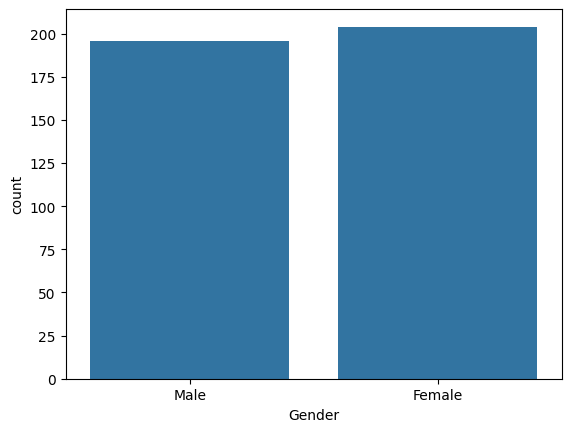

In [490]:
sns.countplot(x=df['Gender'])

<Axes: ylabel='count'>

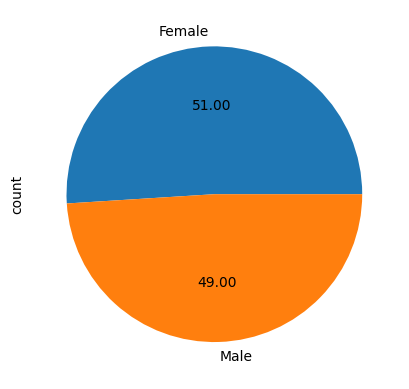

In [491]:
df['Gender'].value_counts().plot(kind='pie', autopct='%.2f')

(array([28., 37., 46., 35., 77., 65., 35., 31., 18., 28.]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <BarContainer object of 10 artists>)

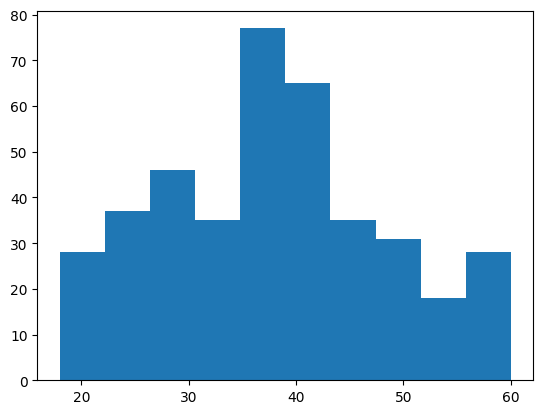

In [492]:
plt.hist(df['Age'])

/tmp/ipython-input-3255828239.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: xlabel='Age', ylabel='Density'>

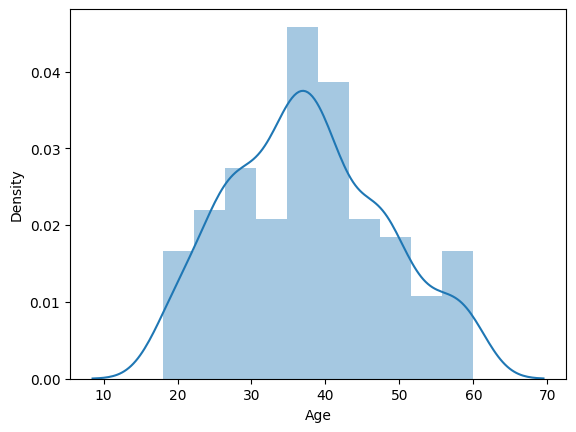

In [493]:
sns.distplot(df['Age'])

<Axes: xlabel='Age'>

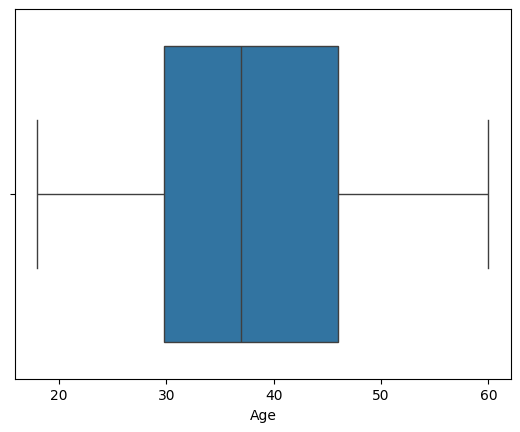

In [494]:
sns.boxplot(x=df['Age'])

**Feature Scaling**
1. Standardisation

In [495]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(df.drop('Purchased', axis = 1), df['Purchased'], test_size = 0.3, random_state=0)

X_train.shape , X_test.shape

((280, 4), (120, 4))

In [496]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Make copies to work with to avoid modifying original X_train, X_test if they are needed later.
X_train_prep = X_train.copy()
X_test_prep = X_test.copy()

# One-hot encode 'Gender' column
X_train_prep = pd.get_dummies(X_train_prep, columns=['Gender'], drop_first=True)
X_test_prep = pd.get_dummies(X_test_prep, columns=['Gender'], drop_first=True)

# Drop 'User ID' as it's an identifier and not a feature for scaling
X_train_prep = X_train_prep.drop('User ID', axis=1)
X_test_prep = X_test_prep.drop('User ID', axis=1)

# Align columns after one-hot encoding, especially if one split lacks a category present in the other
# This ensures both train and test sets have the same columns in the same order.
missing_cols_train = set(X_test_prep.columns) - set(X_train_prep.columns)
for c in missing_cols_train:
    X_train_prep[c] = 0

missing_cols_test = set(X_train_prep.columns) - set(X_test_prep.columns)
for c in missing_cols_test:
    X_test_prep[c] = 0

X_test_prep = X_test_prep[X_train_prep.columns] # Ensure the order of columns is the same

# Initialize and fit StandardScaler
scaler = StandardScaler()
scaler.fit(X_train_prep) # Fit on the processed training data
X_train_scaled = scaler.transform(X_train_prep)
X_test_scaled = scaler.transform(X_test_prep)

In [497]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ,  0.99288247],
       [ 2.17018137,  0.93098672,  0.99288247],
       [ 0.0133054 ,  1.22017719, -1.00716855],
       [ 0.20938504,  1.07558195,  0.99288247],
       [ 0.40546467, -0.48604654, -1.00716855],
       [-0.28081405, -0.31253226,  0.99288247],
       [ 0.99370357, -0.8330751 ,  0.99288247],
       [ 0.99370357,  1.8563962 , -1.00716855],
       [ 0.0133054 ,  1.24909623, -1.00716855],
       [-0.86905295,  2.26126285,  0.99288247],
       [-1.1631724 , -1.5849703 , -1.00716855],
       [ 2.17018137, -0.80415605,  0.99288247],
       [-1.35925203, -1.46929411,  0.99288247],
       [ 0.40546467,  2.2901819 ,  0.99288247],
       [ 0.79762394,  0.75747245, -1.00716855],
       [-0.96709276, -0.31253226,  0.99288247],
       [ 0.11134522,  0.75747245,  0.99288247],
       [-0.96709276,  0.55503912,  0.99288247],
       [ 0.30742485,  0.06341534,  0.99288247],
       [ 0.69958412, -1.26686079,  0.99288247],
       [-0.47689368, -0.0233418 , -1.007

In [498]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_prep.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_prep.columns)

In [499]:
X_train_scaled

,Age,EstimatedSalary,Gender_Male
0,-1.163172,-1.584970,0.992882
1,2.170181,0.930987,0.992882
2,0.013305,1.220177,-1.007169
3,0.209385,1.075582,0.992882
4,0.405465,-0.486047,-1.007169
...,...,...,...
275,0.993704,-1.151185,-1.007169
276,-0.869053,-0.775237,0.992882
277,-0.182774,-0.514966,0.992882
278,-1.065133,-0.457127,-1.007169


In [500]:
X_test_scaled

,Age,EstimatedSalary,Gender_Male
0,-0.771013,0.497201,0.992882
1,0.013305,-0.572804,-1.007169
2,-0.280814,0.150172,0.992882
3,-0.771013,0.265849,-1.007169
4,-0.280814,-0.572804,-1.007169
...,...,...,...
115,1.091743,-0.139018,0.992882
116,0.699584,1.769639,-1.007169
117,-0.672973,0.555039,-1.007169
118,0.797624,0.352606,-1.007169


In [501]:
np.round(X_train.describe(),1)

,User ID,Age,EstimatedSalary
count,280.0,280.0,280.0
mean,15691781.7,37.9,69807.1
std,70759.6,10.2,34641.2
min,15569641.0,18.0,15000.0
25%,15628197.2,30.0,43000.0
50%,15694424.0,37.0,70500.0
75%,15751110.8,46.0,88000.0
max,15814816.0,60.0,150000.0


In [502]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary,Gender_Male
count,280.0,280.0,280.0
mean,0.0,0.0,-0.0
std,1.0,1.0,1.0
min,-1.9,-1.6,-1.0
25%,-0.8,-0.8,-1.0
50%,-0.1,0.0,1.0
75%,0.8,0.5,1.0
max,2.2,2.3,1.0


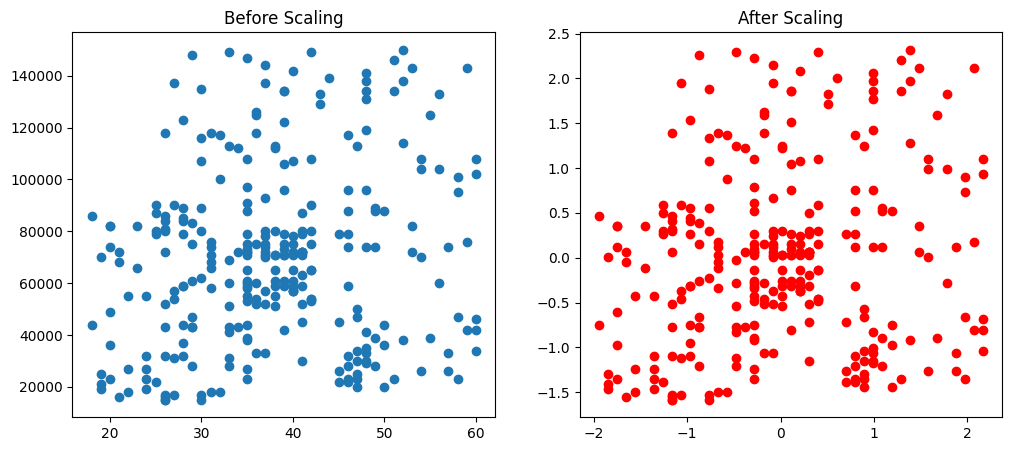

In [503]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'], color='red')
ax2.set_title("After Scaling")
plt.show()

<Axes: title={'center': 'Ater Scaling'}, xlabel='Age', ylabel='Density'>

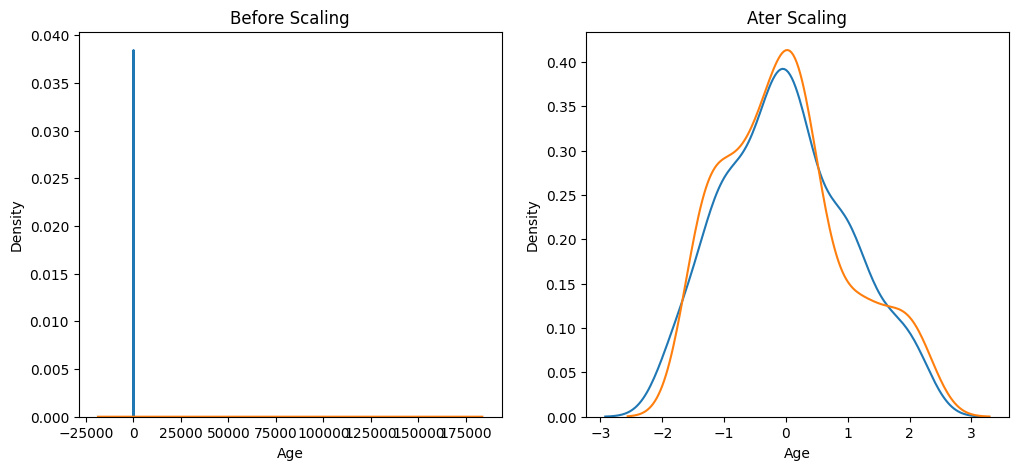

In [504]:
#Before scaling
fig , (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

#After Scaling
ax2.set_title("Ater Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)

*2. Normalization*

In [505]:
wine = pd.read_csv("/content/drive/MyDrive/wine.csv", skiprows=1, header=None, usecols=[0,1,2])
wine.columns=['Class label', 'Alcohol', 'Malic acid']

<Axes: xlabel='Alcohol', ylabel='Density'>

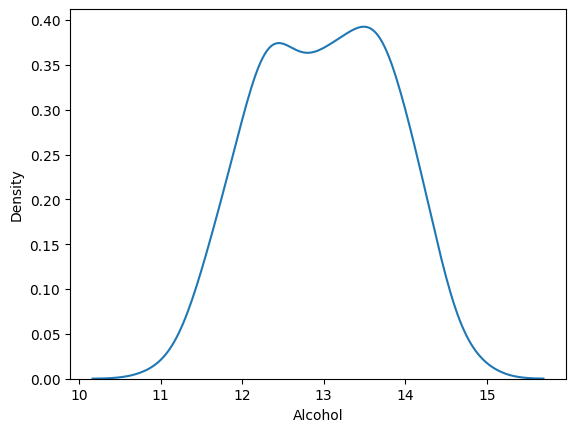

In [506]:
sns.kdeplot(x=wine['Alcohol'])

<Axes: xlabel='Malic acid', ylabel='Density'>

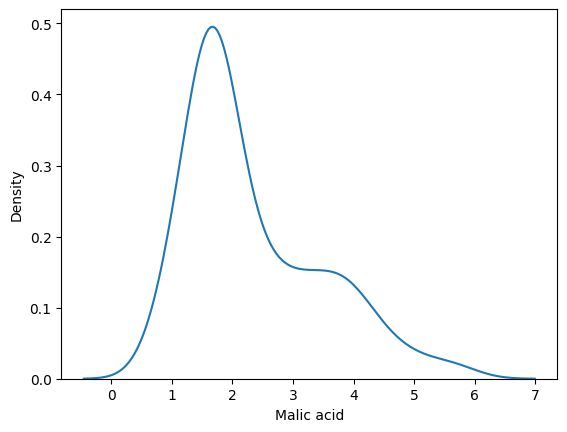

In [507]:
sns.kdeplot(x=wine['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

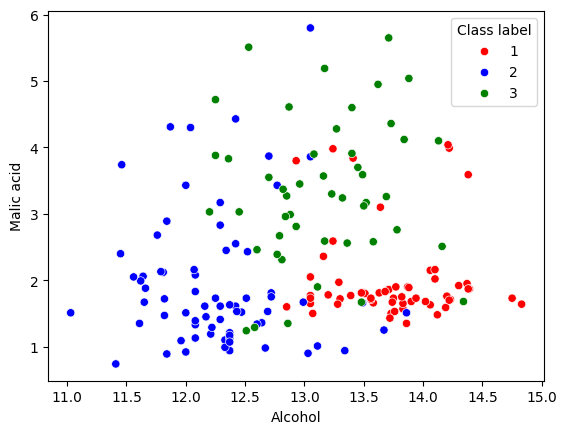

In [508]:
color_dict={1:'red', 3:'green', 2:'blue'}
sns.scatterplot(x=wine['Alcohol'], y=wine['Malic acid'], hue=wine['Class label'], palette=color_dict)

In [509]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(wine.drop('Class label' , axis=1),wine['Class label'],test_size=0.3 , random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [510]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

#fit the training data
scaler.fit(X_train)

#transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [511]:
#as scikit learn convert the dataset into numpy array so we have to convert it into dataframe

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [512]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [513]:
np.round(X_train_scaled.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


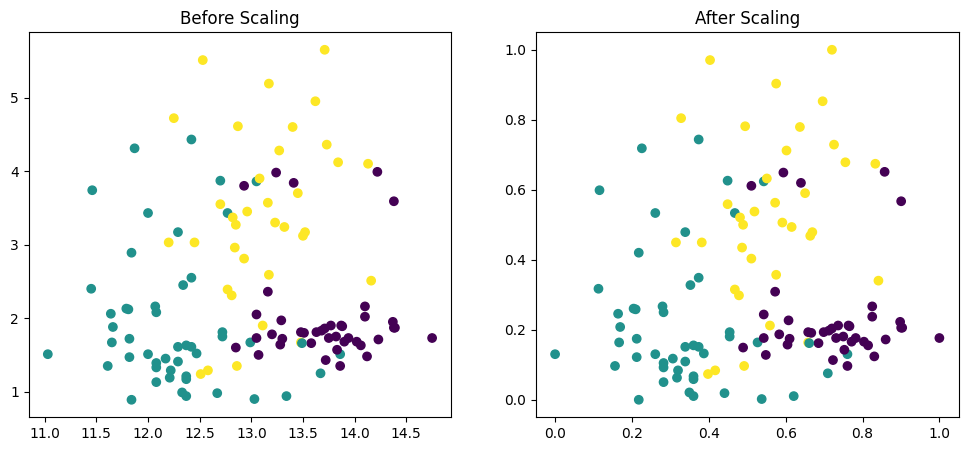

In [514]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))
ax1.scatter(X_train['Alcohol'], X_train['Malic acid'], c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'], c=y_train)
ax2.set_title("After Scaling")
plt.show()

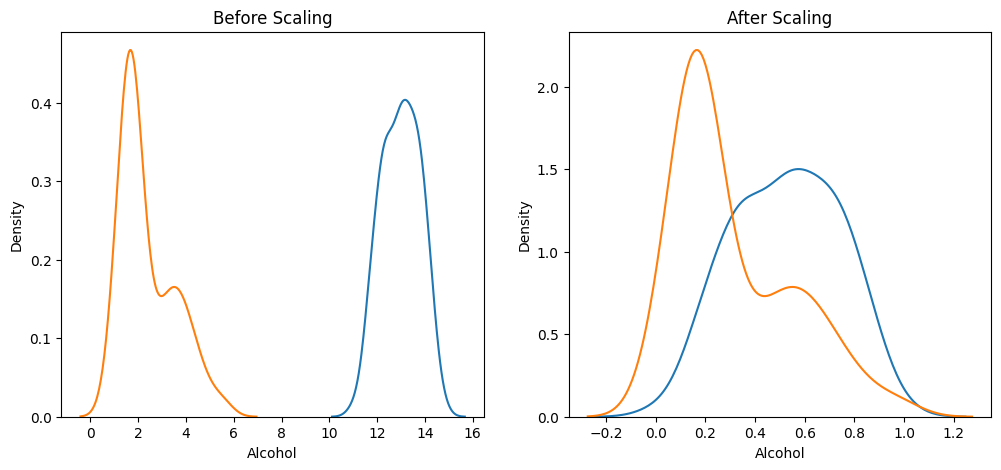

In [515]:
fig, (ax1,ax2) = plt.subplots(ncols=2 , figsize=(12,5))
ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'], ax=ax1)
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'], ax=ax2)
plt.show()

**Encoding**

a. Ordinal Encoder

In [516]:
customer = pd.read_csv('/content/drive/MyDrive/customer.csv')
customer.sample(5)

,age,gender,review,education,purchased
31,22,Female,Poor,School,Yes
12,51,Male,Poor,School,No
40,39,Male,Good,School,No
35,74,Male,Poor,School,Yes
29,83,Female,Average,UG,Yes


In [517]:
customer.iloc[:,2:]

,review,education,purchased
0,Average,School,No
1,Poor,UG,No
2,Good,PG,No
3,Good,PG,No
4,Average,UG,No
5,Average,School,Yes
6,Good,School,No
7,Poor,School,Yes
8,Average,UG,No
9,Good,UG,Yes


In [518]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(customer.iloc[:,2:4], customer.iloc[:,-1], test_size=0.2)

In [519]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['Poor','Average','Good'],['School','UG','PG']])

In [520]:
oe.fit(X_train)

OrdinalEncoder(categories=[['Poor', 'Average', 'Good'], ['School', 'UG', 'PG']])

In [521]:
X_train = oe.transform(X_train)
X_test = oe.transform(X_test)


In [522]:
customer.head()

,age,gender,review,education,purchased
0,30,Female,Average,School,No
1,68,Female,Poor,UG,No
2,70,Female,Good,PG,No
3,72,Female,Good,PG,No
4,16,Female,Average,UG,No


In [523]:
X_train

array([[2., 1.],
       [2., 0.],
       [1., 0.],
       [0., 1.],
       [2., 2.],
       [0., 0.],
       [0., 2.],
       [0., 2.],
       [1., 1.],
       [0., 0.],
       [0., 2.],
       [2., 2.],
       [1., 1.],
       [0., 2.],
       [2., 2.],
       [1., 0.],
       [0., 1.],
       [0., 2.],
       [2., 0.],
       [2., 1.],
       [2., 2.],
       [2., 0.],
       [1., 1.],
       [2., 1.],
       [2., 1.],
       [2., 1.],
       [2., 1.],
       [0., 0.],
       [1., 1.],
       [2., 0.],
       [1., 0.],
       [1., 0.],
       [2., 2.],
       [0., 2.],
       [0., 0.],
       [0., 2.],
       [1., 1.],
       [1., 0.],
       [0., 2.],
       [2., 0.]])

In [524]:
data = {
    'Product':['A','B','C','D','E','F'],
    'Price':[100,200,300,400,500,600],
    'Size':['Small', 'Medium', 'Large', 'Medium', 'Small', 'Large']
}
df=pd.DataFrame(data)
size_order = [['Small','Medium','Large']]
od = OrdinalEncoder(categories=size_order)
df['Size_encoded'] = od.fit_transform(df[['Size']])
df

,Product,Price,Size,Size_encoded
0,A,100,Small,0.0
1,B,200,Medium,1.0
2,C,300,Large,2.0
3,D,400,Medium,1.0
4,E,500,Small,0.0
5,F,600,Large,2.0


b. Label Encoder

In [525]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [526]:
y_train

array([1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0])

In [527]:
df['colour_encoded'] = le.fit_transform(df['Size'])
df

,Product,Price,Size,Size_encoded,colour_encoded
0,A,100,Small,0.0,2
1,B,200,Medium,1.0,1
2,C,300,Large,2.0,0
3,D,400,Medium,1.0,1
4,E,500,Small,0.0,2
5,F,600,Large,2.0,0


c. One-Hot Encoder

i) Using Pandas


In [528]:
from sklearn.preprocessing import OneHotEncoder
df_one_hot_encoder = pd.get_dummies(df, columns=['Size'] , prefix='Size')
print(df_one_hot_encoder)

  Product  Price  Size_encoded  colour_encoded  Size_Large  Size_Medium  \
0       A    100           0.0               2       False        False   
1       B    200           1.0               1       False         True   
2       C    300           2.0               0        True        False   
3       D    400           1.0               1       False         True   
4       E    500           0.0               2       False        False   
5       F    600           2.0               0        True        False   

   Size_Small  
0        True  
1       False  
2       False  
3       False  
4        True  
5       False  


In [529]:
encoder = OneHotEncoder(sparse_output=False)

encoded_colors = encoder.fit_transform(df[['Size']])


In [530]:
encoded_df_sk = pd.DataFrame(encoded_colors, columns=encoder.get_feature_names_out(['Size']))

df_one_hot_sk = pd.concat([df.drop('Size', axis=1), encoded_df_sk], axis=1)

print("\nOne-Hot Encoding with sklearn:")
print(df_one_hot_sk)



One-Hot Encoding with sklearn:
  Product  Price  Size_encoded  colour_encoded  Size_Large  Size_Medium  \
0       A    100           0.0               2         0.0          0.0   
1       B    200           1.0               1         0.0          1.0   
2       C    300           2.0               0         1.0          0.0   
3       D    400           1.0               1         0.0          1.0   
4       E    500           0.0               2         0.0          0.0   
5       F    600           2.0               0         1.0          0.0   

   Size_Small  
0         1.0  
1         0.0  
2         0.0  
3         0.0  
4         1.0  
5         0.0  


**Column Transformer**

In [531]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [532]:
toy = pd.read_csv('/content/drive/MyDrive/covid_toy.csv')


In [533]:
toy.sample(5)

,age,gender,fever,cough,city,has_covid
37,55,Male,100.0,Mild,Kolkata,No
39,50,Female,103.0,Mild,Kolkata,No
65,69,Female,102.0,Mild,Bangalore,No
17,40,Female,98.0,Strong,Delhi,No
67,65,Male,99.0,Mild,Bangalore,No


In [534]:
toy.shape

(100, 6)

In [535]:
toy.isnull().sum()

,0
age,0
gender,0
fever,10
cough,0
city,0
has_covid,0


In [536]:
toy.duplicated().sum()

np.int64(1)

<Axes: xlabel='cough', ylabel='count'>

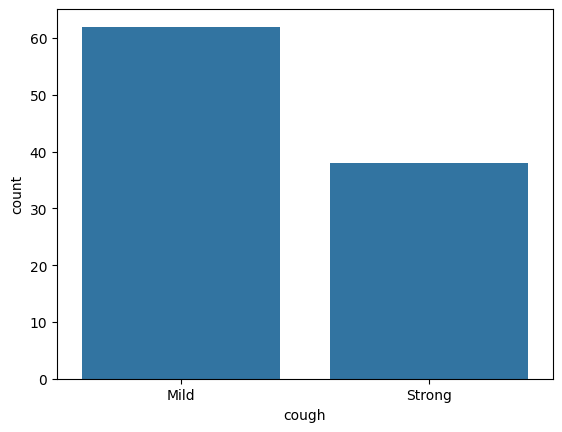

In [537]:
import seaborn as sns
sns.countplot(x=toy['cough'])

In [538]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(toy.drop(columns=['has_covid']), toy['has_covid'], test_size=0.2)

In [539]:
X_train, y_train

(    age  gender  fever   cough       city
 84   69  Female   98.0  Strong     Mumbai
 47   18  Female  104.0    Mild  Bangalore
 63   10    Male  100.0    Mild  Bangalore
 73   34    Male   98.0  Strong    Kolkata
 32   34  Female  101.0  Strong      Delhi
 ..  ...     ...    ...     ...        ...
 79   48  Female  103.0    Mild    Kolkata
 25   23    Male    NaN    Mild     Mumbai
 12   25  Female   99.0  Strong    Kolkata
 67   65    Male   99.0    Mild  Bangalore
 59    6  Female  104.0    Mild    Kolkata
 
 [80 rows x 5 columns],
 84     No
 47     No
 63     No
 73    Yes
 32    Yes
      ... 
 79    Yes
 25     No
 12     No
 67     No
 59    Yes
 Name: has_covid, Length: 80, dtype: object)

In [540]:
#adding simple imputer to fever col - convert the missing data with mean
si = SimpleImputer()
X_train_fever = si.fit_transform(X_train[['fever']])
X_test_fever = si.fit_transform(X_test[['fever']])
X_train_fever

array([[ 98.        ],
       [104.        ],
       [100.        ],
       [ 98.        ],
       [101.        ],
       [ 98.        ],
       [100.        ],
       [101.        ],
       [104.        ],
       [100.63888889],
       [104.        ],
       [103.        ],
       [100.63888889],
       [101.        ],
       [ 98.        ],
       [101.        ],
       [ 98.        ],
       [100.        ],
       [100.        ],
       [101.        ],
       [101.        ],
       [103.        ],
       [103.        ],
       [ 99.        ],
       [102.        ],
       [100.        ],
       [101.        ],
       [100.        ],
       [100.63888889],
       [102.        ],
       [104.        ],
       [102.        ],
       [101.        ],
       [101.        ],
       [100.        ],
       [104.        ],
       [100.        ],
       [ 99.        ],
       [103.        ],
       [100.        ],
       [ 98.        ],
       [101.        ],
       [100.63888889],
       [101

In [541]:
#Ordinal Encoding
oe = OrdinalEncoder(categories=[['Mild', 'Strong']])
X_train_cough = oe.fit_transform(X_train[['cough']])
X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough

array([[1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [542]:
#OneHot Encoding
ohe = OneHotEncoder(drop='first', sparse_output=False)
X_train_gender_city = ohe.fit_transform(X_train[['gender', 'city']])
X_test_gender_city = ohe.fit_transform(X_test[['gender', 'city']])
X_train_gender_city

array([[0., 0., 0., 1.],
       [0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 1.],
       [1., 0., 0., 1.],
       [0., 0., 0., 0.],
       [1., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 0.],
       [1., 0., 1., 0.],


In [543]:
#Extracting age
X_train_age = X_train.drop(columns=['gender','fever','cough' , 'city']).values
X_test_age = X_test.drop(columns=['gender','fever','cough' , 'city']).values
X_train_age.shape

(80, 1)

In [544]:
X_train_transformed = np.concatenate((X_train_age, X_train_cough, X_train_gender_city,X_train_fever),axis=1)
X_test_transformed = np.concatenate((X_test_age, X_test_cough, X_test_gender_city,X_test_fever),axis=1)
X_train_transformed.shape
X_train_transformed

array([[ 69.        ,   1.        ,   0.        ,   0.        ,
          0.        ,   1.        ,  98.        ],
       [ 18.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        , 104.        ],
       [ 10.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        , 100.        ],
       [ 34.        ,   1.        ,   1.        ,   0.        ,
          1.        ,   0.        ,  98.        ],
       [ 34.        ,   1.        ,   0.        ,   1.        ,
          0.        ,   0.        , 101.        ],
       [ 71.        ,   1.        ,   0.        ,   0.        ,
          1.        ,   0.        ,  98.        ],
       [ 11.        ,   0.        ,   1.        ,   0.        ,
          0.        ,   0.        , 100.        ],
       [ 15.        ,   0.        ,   1.        ,   1.        ,
          0.        ,   0.        , 101.        ],
       [ 12.        ,   0.        ,   0.        ,   0.        ,
          0.    

**Column Transformer**

In [545]:
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer(
    transformers=[
        ('tnf1', SimpleImputer(), ['fever']),
        ('tnf2', OrdinalEncoder(categories=[['Mild','Strong']]), ['cough']),
        ('tnf3', OneHotEncoder(sparse_output=False, drop='first'), ['gender','city'])
    ],
    remainder='passthrough')

In [546]:
transformer.fit_transform(X_train).shape

(80, 7)

In [547]:
transformer.transform(X_test).shape

(20, 7)

Function Transfomer

In [548]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer

In [549]:
titanic = pd.read_csv('/content/drive/MyDrive/train.csv' , usecols=['Age', 'Fare', 'Survived'])


In [550]:
titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [551]:
titanic.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [552]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [553]:
titanic.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [554]:
X = titanic.iloc[:,1:3]
y = titanic.iloc[:,0]

In [555]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

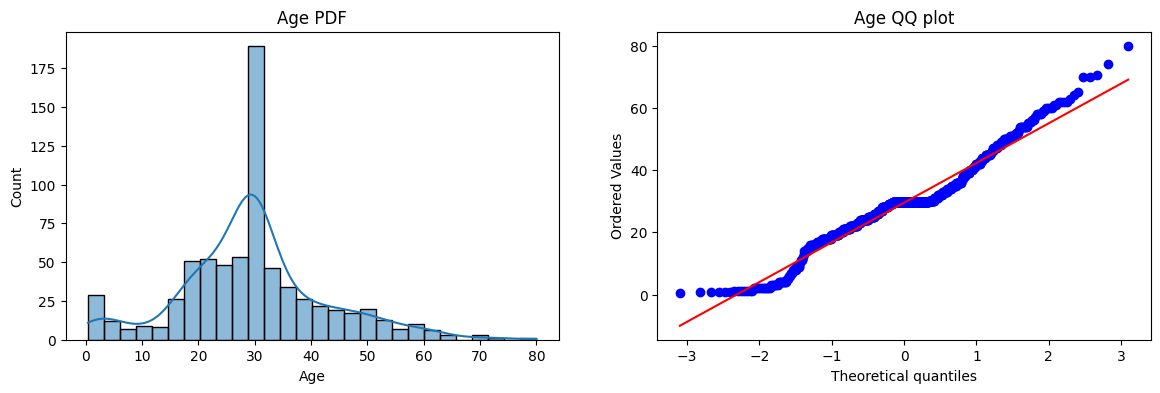

In [556]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True) # Changed distplot to histplot for newer seaborn versions
plt.title('Age PDF')

plt.subplot(122) # Changed to 122 for a separate subplot
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')
plt.show()

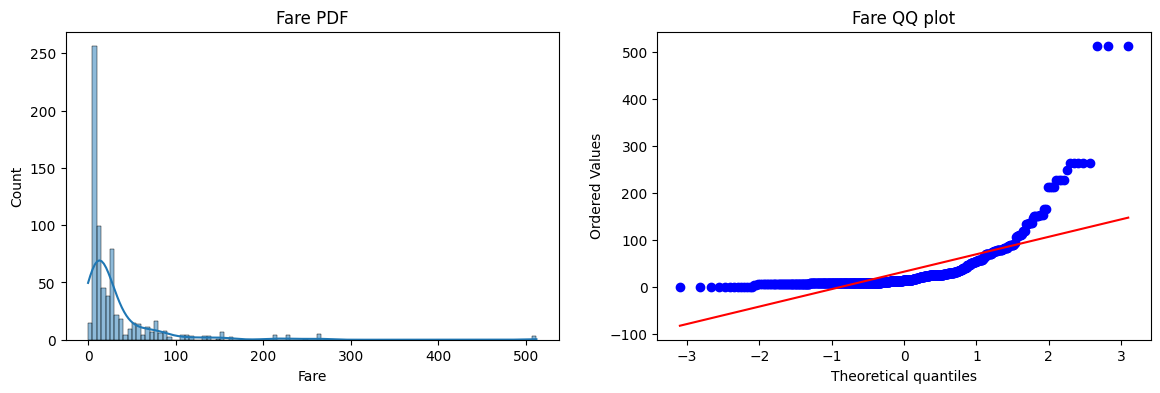

In [557]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')
plt.show()

In [558]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred = clf2.predict(X_test)

print("Accuracy Score LR", accuracy_score(y_test, y_pred))
print("Accuracy Score DT", accuracy_score(y_test, y_pred))

Accuracy Score LR 0.6815642458100558
Accuracy Score DT 0.6815642458100558


In [559]:
trf = FunctionTransformer(func=np.log1p)

In [560]:
X_train_transformerd = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [561]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformerd, y_train)
clf2.fit(X_train_transformerd, y_train)

y_pred_lr = clf.predict(X_test_transformed)
y_pred_dt = clf2.predict(X_test_transformed)

print("Accuracy Score LR", accuracy_score(y_test, y_pred_lr))
print("Accuracy Score DT", accuracy_score(y_test, y_pred_dt))

Accuracy Score LR 0.6815642458100558
Accuracy Score DT 0.6703910614525139


In [562]:
X_transformed = trf.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
print("LR",np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print("DT",np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR 0.678027465667915
DT 0.6621847690387017


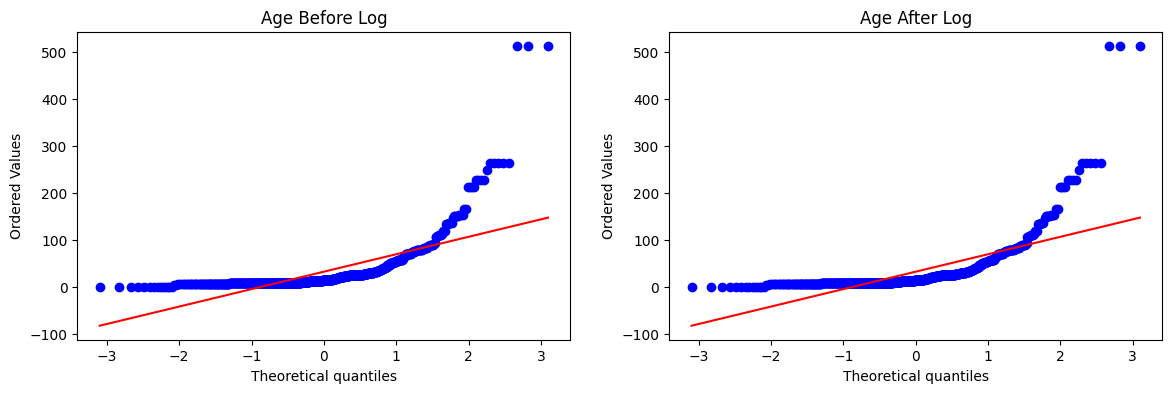

In [563]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Age After Log')
plt.show()

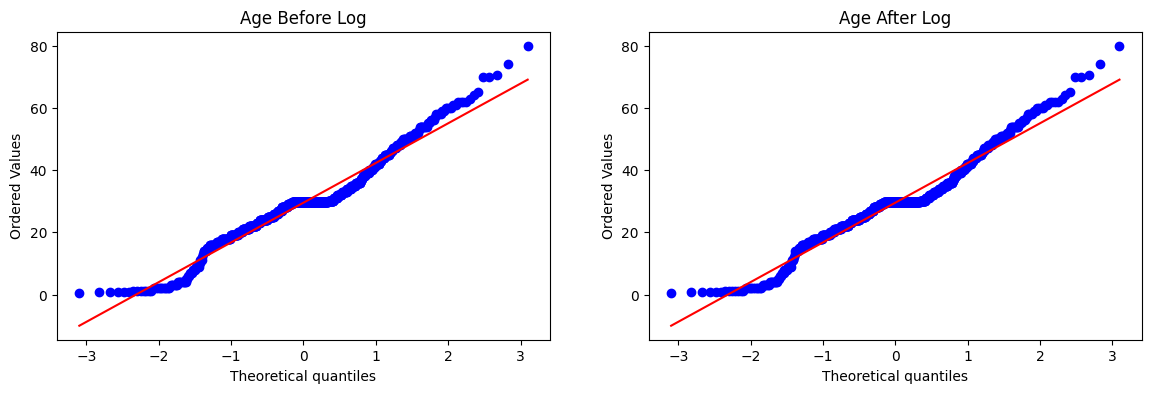

In [564]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age After Log')
plt.show()

Encoding - Numerical Vlaues

a. Binning

In [565]:
from sklearn.preprocessing import KBinsDiscretizer

In [566]:
df.dropna(inplace=True)

In [567]:
titanic.shape

(891, 3)

In [568]:
X = titanic.iloc[:,1:3]
y = titanic.iloc[:,0]

In [569]:
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [570]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [571]:
accuracy_score(y_test, y_pred)

0.6815642458100558

In [572]:
np.mean(cross_val_score(DecisionTreeClassifier(), X, y, cv=10, scoring='accuracy'))

np.float64(0.6610861423220973)

In [573]:
kbin_age = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')
kbin_fare = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='kmeans')

In [574]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      , 16.77247824, 31.15369289, 42.32096774, 55.18275862,
              80.        ])                                                   ],
      dtype=object)

In [575]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42      , 16.77247824, 31.15369289, 42.32096774, 55.18275862,
              80.        ])                                                   ],
      dtype=object)

In [576]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
728,25.000000,1.0,26.0000,0.0,"(16.772, 31.154]","(0.0, 40.404]"
862,48.000000,3.0,25.9292,0.0,"(42.321, 55.183]","(0.0, 40.404]"
770,24.000000,1.0,9.5000,0.0,"(16.772, 31.154]","(0.0, 40.404]"
304,29.699118,1.0,8.0500,0.0,"(16.772, 31.154]","(0.0, 40.404]"
279,35.000000,2.0,20.2500,0.0,"(31.154, 42.321]","(0.0, 40.404]"


In [577]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)
accuracy_score(y_test,y_pred2)

0.6424581005586593

In [578]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

np.float64(0.6621972534332085)

In [579]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)

    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])

    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()


0.6633083645443196


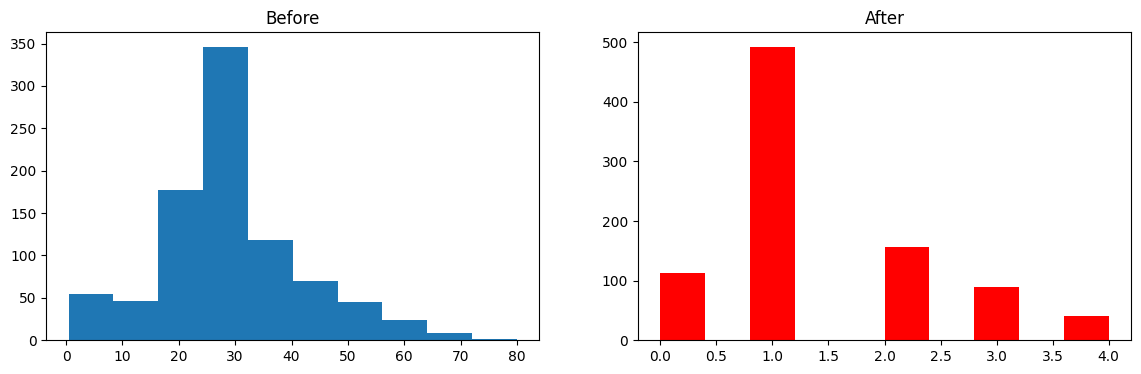

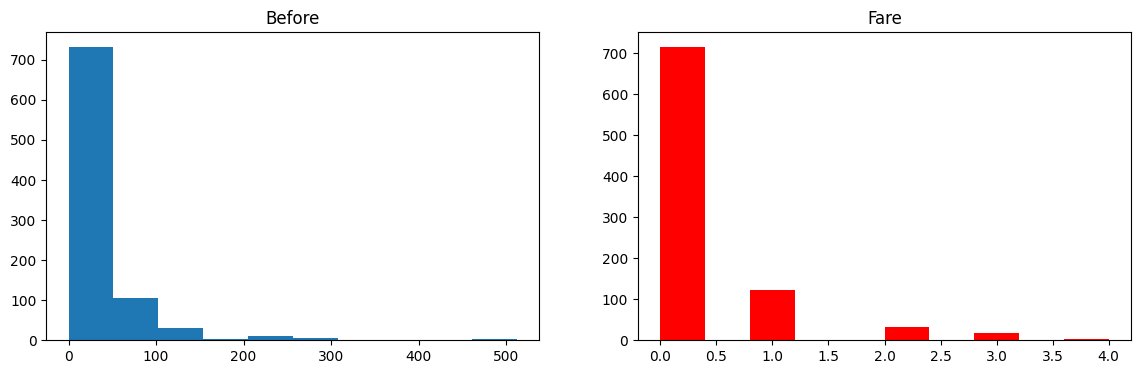

In [580]:
discretize(5,'kmeans')

**Handling Data**

a. Mixed Data

In [581]:
tit = pd.read_csv('/content/drive/MyDrive/titanic.csv')
tit.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [582]:
tit['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

Text(0.5, 1.0, 'Passengers Travelling With')

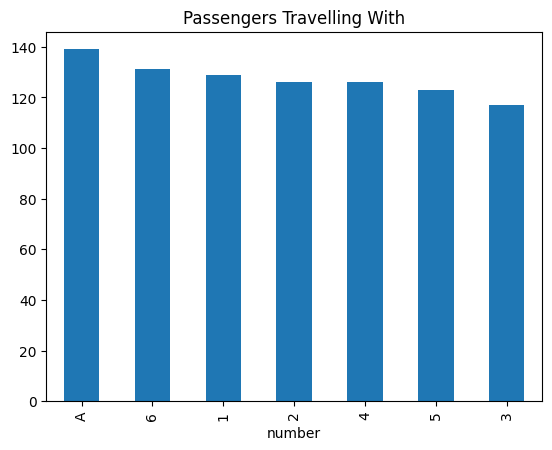

In [583]:
fig = tit['number'].value_counts().plot.bar()
fig.set_title('Passengers Travelling With')

In [584]:
#Extract Numerical Value
tit['number_numerical'] = pd.to_numeric(tit["number"], errors='coerce', downcast='float')

In [585]:
#extract categorical value
tit['number_categorical'] = np.where(tit['number_numerical'].isnull(), tit['number'], np.nan)

In [586]:
tit.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [587]:
tit['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [588]:
tit['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [589]:
tit['cabin_num'] = tit['Cabin'].str.extract('(\d+)')
tit['cabin_cat'] = tit['Cabin'].str[0]
tit.head()

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-192278305.py:1: SyntaxWarning: invalid escape sequence '\d'
  tit['cabin_num'] = tit['Cabin'].str.extract('(\d+)')


,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


<Axes: xlabel='cabin_cat'>

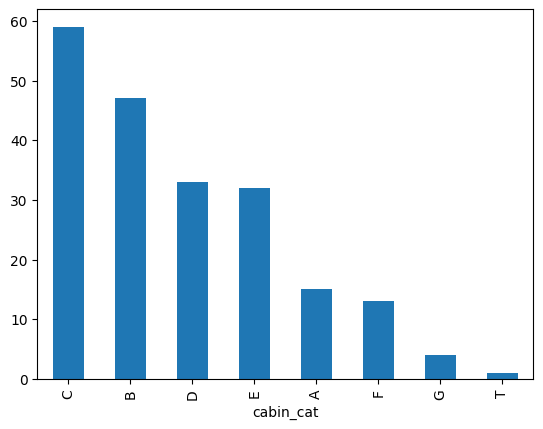

In [590]:
tit['cabin_cat'].value_counts().plot(kind='bar')

b. Date and Time

In [591]:
date = pd.read_csv('/content/drive/MyDrive/orders.csv')
time = pd.read_csv('/content/drive/MyDrive/messages.csv')

In [592]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [593]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [594]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [595]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


Working with dates

In [596]:
#Coverting to datetime datatype
date['date'] = pd.to_datetime(date['date'])
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


In [597]:
#Extracting year
date['date_year'] = date['date'].dt.year


In [598]:
#Extracting month
date['month_no'] = date['date'].dt.month

In [599]:
#Extracting month name
date['month_name'] = date['date'].dt.month_name()

In [600]:
date.sample(5)

,date,product_id,city_id,orders,date_year,month_no,month_name
604,2019-12-05,5708,26,1,2019,12,December
496,2019-03-16,3562,23,1,2019,3,March
204,2018-10-07,820,30,2,2018,10,October
321,2019-12-04,2981,26,461,2019,12,December
222,2019-01-22,5002,13,15,2019,1,January


In [601]:
#extracting days
date['day'] = date['date'].dt.day
date.head()

,date,product_id,city_id,orders,date_year,month_no,month_name,day
0,2019-12-10,5628,25,3,2019,12,December,10
1,2018-08-15,3646,14,157,2018,8,August,15
2,2018-10-23,1859,25,1,2018,10,October,23
3,2019-08-17,7292,25,1,2019,8,August,17
4,2019-01-06,4344,25,3,2019,1,January,6


In [602]:
#extracting day of week
date['day_of_week'] = date['date'].dt.dayofweek
date.head()

,date,product_id,city_id,orders,date_year,month_no,month_name,day,day_of_week
0,2019-12-10,5628,25,3,2019,12,December,10,1
1,2018-08-15,3646,14,157,2018,8,August,15,2
2,2018-10-23,1859,25,1,2018,10,October,23,1
3,2019-08-17,7292,25,1,2019,8,August,17,5
4,2019-01-06,4344,25,3,2019,1,January,6,6


In [603]:
date['date_now_name'] = date['date'].dt.day_name()

In [604]:
import datetime
today = datetime.datetime.today()
today

datetime.datetime(2026, 1, 2, 19, 26, 58, 457045)

In [605]:
time

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше
...,...,...
995,2012-03-16 00:50:00,ПАРЕНЬ СДЕЛАЕТ МАССАЖ ЖЕНЩИНАМ -066-877-32-44
996,2014-01-23 23:14:00,сельский п 23 ищу девушку для отношений
997,2012-10-15 23:37:00,Д+Д ДЛЯ серьезных отношений. Мой номер 093-156...
998,2012-06-21 23:34:00,7 ДНЕПР М.34 ПОЗ.С Д/Ж ДЛЯ ВСТРЕЧ.Т.098 809 15 14


In [606]:
time['date'] = pd.to_datetime(time['date'])
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [607]:
time['hour'] = time['date'].dt.hour
time['minutes'] = time['date'].dt.minute
time['seconds'] = time['date'].dt.second
time.head()

,date,msg,hour,minutes,seconds
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


**Handling Missing Data**

**Complete Case Analysis (CCA)**



In [608]:
data_science = pd.read_csv('/content/drive/MyDrive/data_science_job.csv')
data_science.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [609]:
data_science.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,479
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [610]:
cols = [var for var in data_science.columns if data_science[var].isnull().mean() < 0.05 and data_science[var].isnull().mean() > 0]

In [611]:
data_science[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
8936,0.887,NaN,Graduate,20.0,37.0
5735,0.939,no_enrollment,Masters,9.0,192.0
1950,0.924,Full time course,Graduate,6.0,45.0
13352,0.743,no_enrollment,Graduate,4.0,113.0
6871,NaN,NaN,Graduate,0.0,13.0


In [612]:
len(data_science[cols].dropna())/len(data_science)

0.8968577095730244

In [613]:
new_data_science = data_science[cols].dropna()
new_data_science.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


In [614]:
new_data_science.shape , data_science.shape

((17182, 5), (19158, 13))

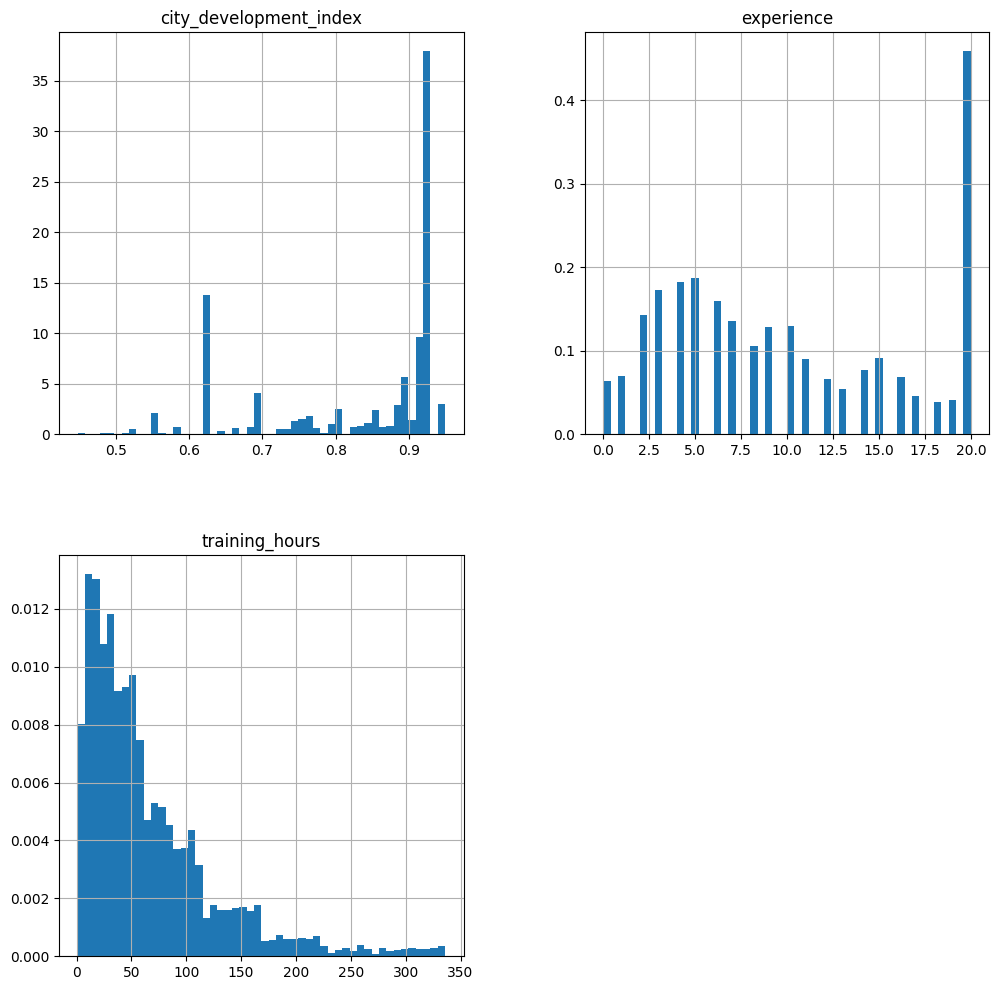

In [615]:
new_data_science.hist(bins=50, density=True, figsize=(12,12))
plt.show()

<Axes: >

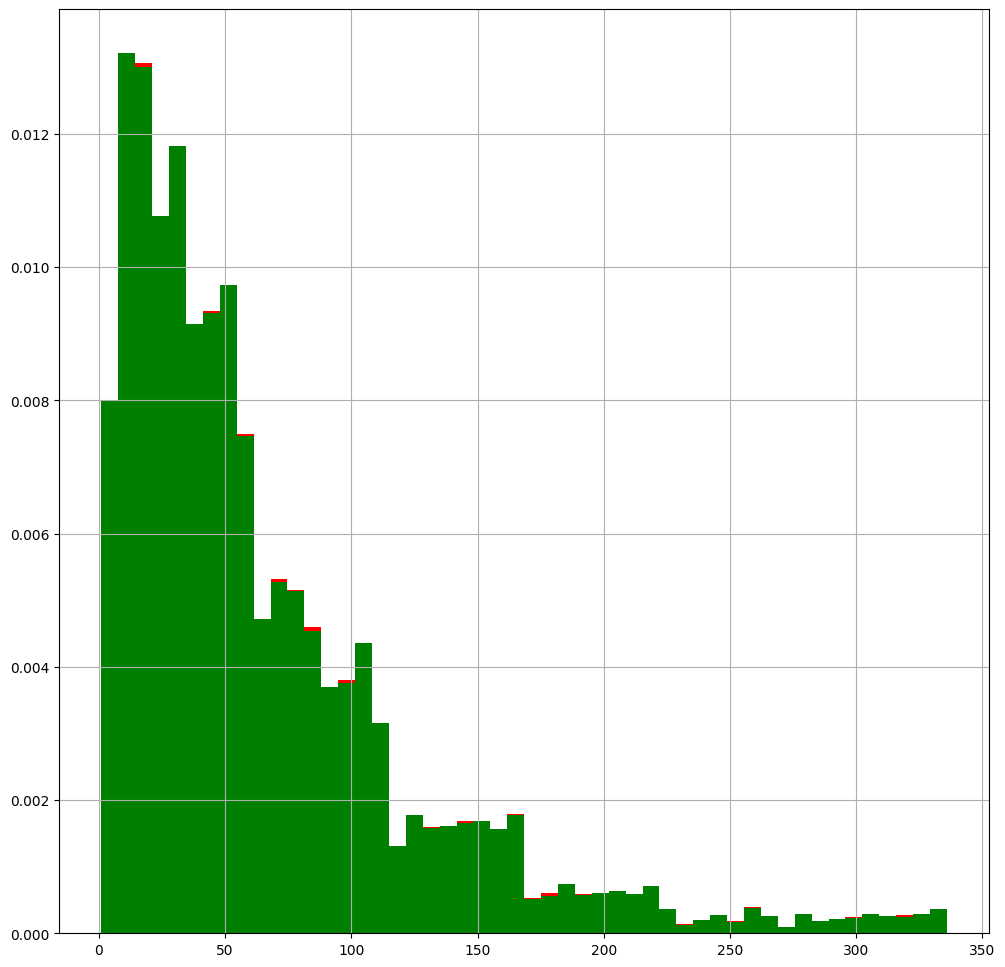

In [616]:
fig = plt.figure()
ax = fig.add_subplot(111)

#before applying CCA

data_science['training_hours'].hist(bins=50, density=True, figsize=(12,12), ax=ax , color='red')

#after applying CCA
new_data_science['training_hours'].hist(bins=50, density=True, figsize=(12,12) , ax=ax, color='green')

<Axes: ylabel='Density'>

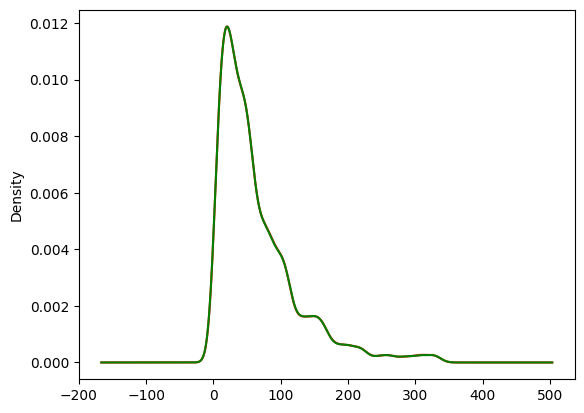

In [617]:
fig = plt.figure()
ax = fig.add_subplot(111)

#before applying CCA

data_science['training_hours'].plot.density(color='red')

#after applying CCA
new_data_science['training_hours'].plot.density(color='green')

<Axes: >

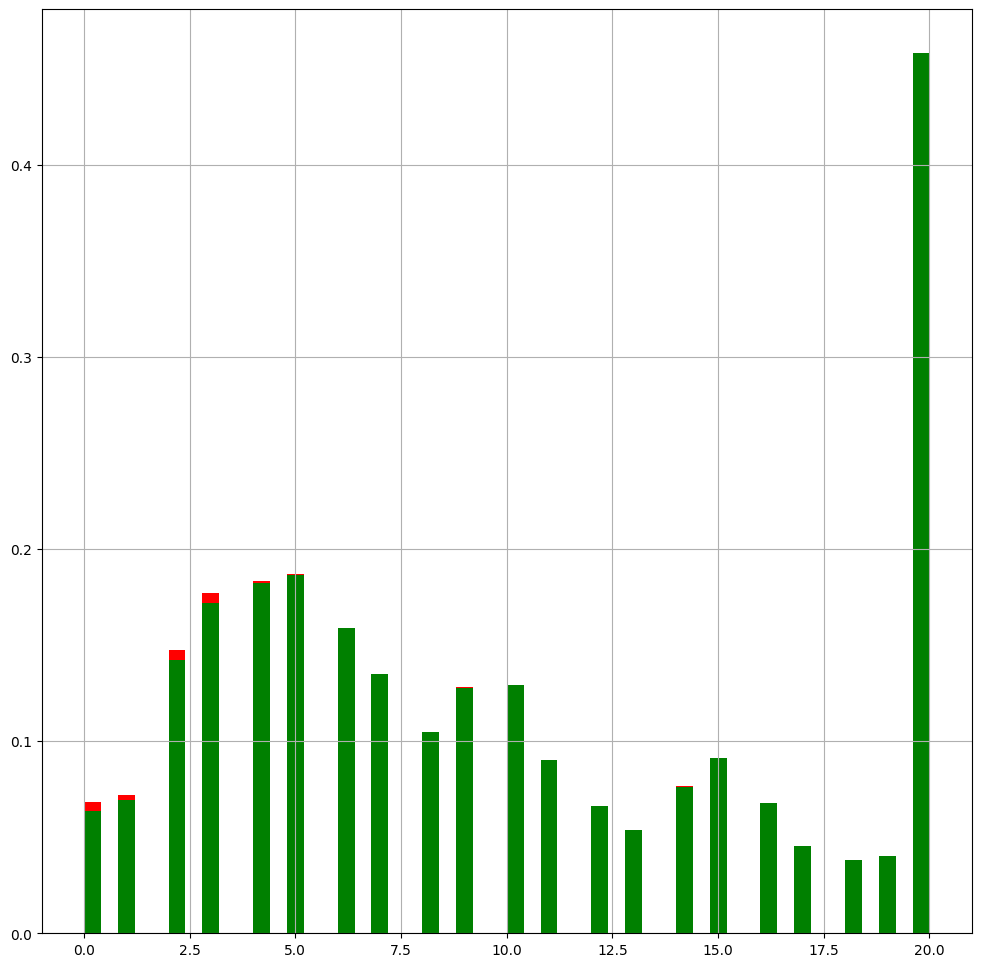

In [618]:
fig = plt.figure()
ax = fig.add_subplot(111)

#before applying CCA

data_science['experience'].hist(bins=50, density=True, figsize=(12,12), ax=ax , color='red')

#after applying CCA
new_data_science['experience'].hist(bins=50, density=True, figsize=(12,12) , ax=ax, color='green')

<Axes: ylabel='Density'>

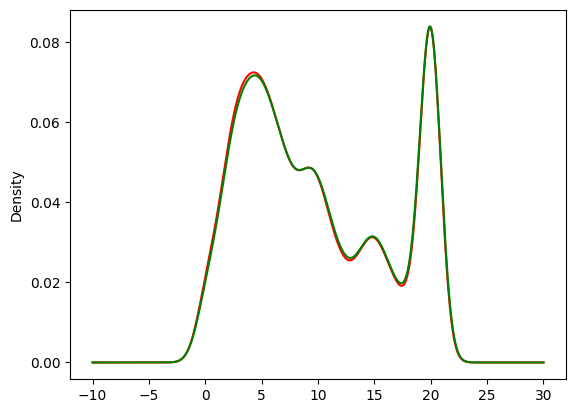

In [619]:
fig = plt.figure()
ax = fig.add_subplot(111)

#before applying CCA

data_science['experience'].plot.density(color='red')

#after applying CCA
new_data_science['experience'].plot.density(color='green')

<Axes: >

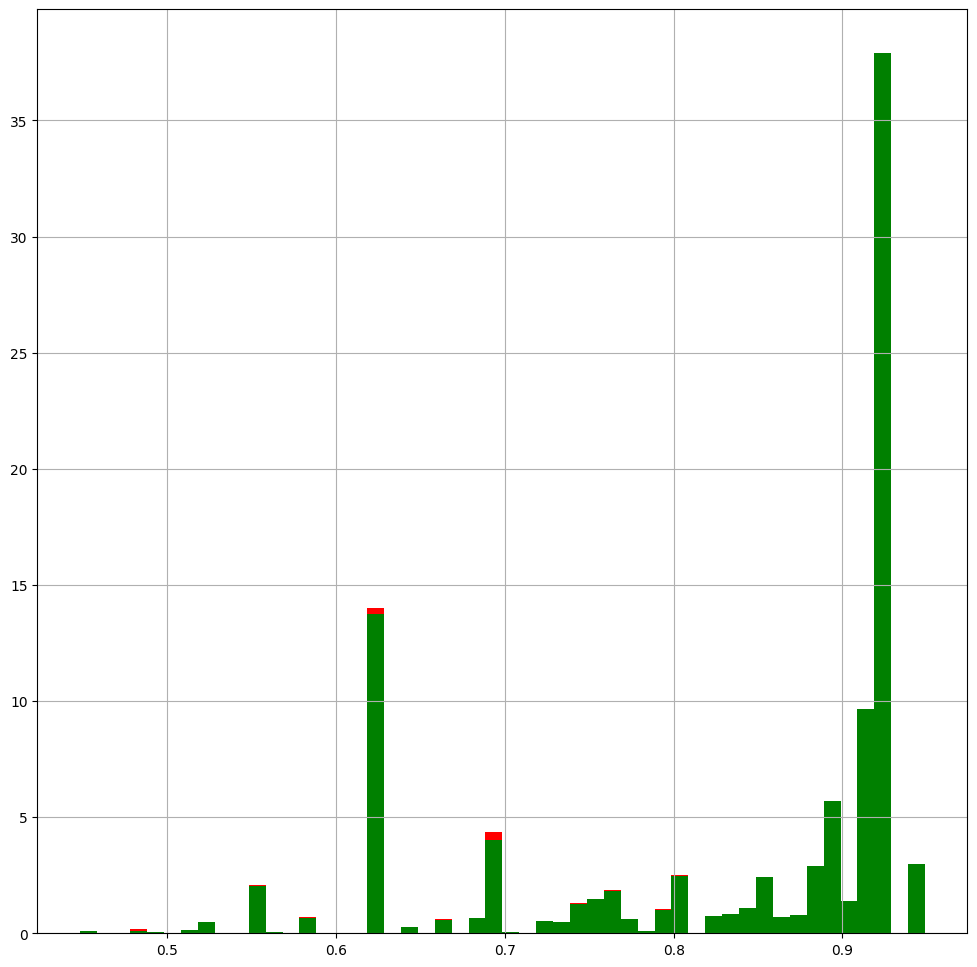

In [620]:
fig = plt.figure()
ax = fig.add_subplot(111)

#before applying CCA

data_science['city_development_index'].hist(bins=50, density=True, figsize=(12,12), ax=ax , color='red')

#after applying CCA
new_data_science['city_development_index'].hist(bins=50, density=True, figsize=(12,12) , ax=ax, color='green')

<Axes: ylabel='Density'>

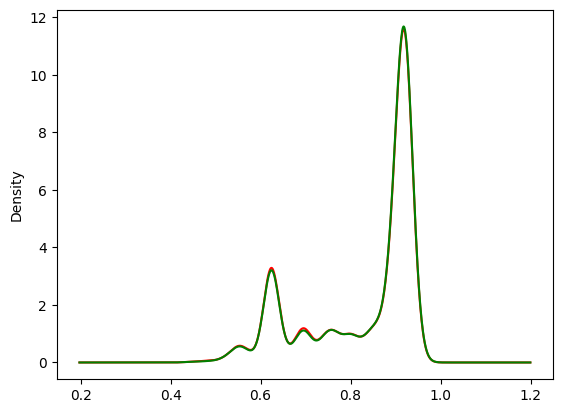

In [621]:
fig = plt.figure()
ax = fig.add_subplot(111)

#before applying CCA

data_science['city_development_index'].plot.density(color='red')

#after applying CCA
new_data_science['city_development_index'].plot.density(color='green')

In [622]:
temp = pd.concat([
    data_science['enrolled_university'].value_counts() / len(data_science),
    new_data_science['enrolled_university'].value_counts() / len(new_data_science)
],axis=1)
temp.columns=['original' , 'CCA']
temp

,original,CCA
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [623]:
temp = pd.concat([
    data_science['education_level'].value_counts() / len(data_science),
    new_data_science['education_level'].value_counts() / len(new_data_science)
],axis=1)
temp.columns=['original' , 'CCA']
temp

,original,CCA
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


**Handling Numerical Data**

1. Mean-median-imputation

---



In [624]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
tit1= pd.read_csv('/content/drive/MyDrive/titanic_toy.csv')
tit1.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [625]:
tit1.isnull().sum()

,0
Age,177
Fare,45
Family,0
Survived,0


In [626]:
X = tit1.drop(columns='Survived')
y = tit1['Survived']

In [627]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [628]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [629]:
tit1['Age_median'] = X_train['Age'].fillna(median_age)
tit1['Age_mean'] = X_train['Age'].fillna(mean_age)

tit1['Fare_median'] = X_train['Fare'].fillna(median_fare)
tit1['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
tit1.sample(5)

,Age,Fare,Family,Survived,Age_median,Age_mean,Fare_median,Fare_mean
419,10.0,24.15,2,0,NaN,NaN,NaN,NaN
846,NaN,69.55,10,0,NaN,NaN,NaN,NaN
259,50.0,NaN,1,1,50.0,50.0,14.4583,32.617597
829,62.0,80.00,0,1,62.0,62.0,80.0000,80.000000
355,28.0,NaN,0,0,NaN,NaN,NaN,NaN


In [630]:
print("Original Age Variable Variance", X_train['Age'].var())

imputed_age_median_from_X_train = X_train['Age'].fillna(median_age)
print("Median Age Variable Variance (from X_train, median imputed)", imputed_age_median_from_X_train.var())

imputed_age_mean_from_X_train = X_train['Age'].fillna(mean_age)
print("Mean Age Variable Variance (from X_train, mean imputed)", imputed_age_mean_from_X_train.var())

Original Age Variable Variance 204.3495133904614
Median Age Variable Variance (from X_train, median imputed) 161.9895663346054
Mean Age Variable Variance (from X_train, mean imputed) 161.81262452718673


In [631]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [632]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')


In [633]:
trf=ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [634]:
trf.fit(X_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [635]:
trf.named_transformers_['imputer1'].statistics_


array([28.75])

In [636]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [637]:
# Ensure X_train and X_test are DataFrames before transformation
# This is crucial because ColumnTransformer was defined with string column names.
# X (Variable #1) contains the original column names.
X_train_df = pd.DataFrame(X_train, columns=X.columns)
X_test_df = pd.DataFrame(X_test, columns=X.columns)

# Now, apply the transformation on the DataFrames
X_train = trf.transform(X_train_df)
X_test = trf.transform(X_test_df)
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])

2. Arbitrary Value Imputation

In [638]:
X = tit1.drop(columns='Survived')
y = tit1['Survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

tit1['Age_99'] = X_train['Age'].fillna(99)
tit1['Age_minusone'] = X_train['Age'].fillna(-1)

tit1['Fare_99'] = X_train['Fare'].fillna(99)
tit1['Fare_minusone'] = X_train['Fare'].fillna(-1)
tit1.sample(5)

,Age,Fare,Family,Survived,Age_median,Age_mean,Fare_median,Fare_mean,Age_99,Age_minusone,Fare_99,Fare_minusone
282,16.0,9.5000,0,0,16.0,16.0,9.5000,9.5000,16.0,16.0,9.5000,9.5000
148,36.5,26.0000,2,0,36.5,36.5,26.0000,26.0000,36.5,36.5,26.0000,26.0000
173,21.0,7.9250,0,0,21.0,21.0,7.9250,7.9250,21.0,21.0,7.9250,7.9250
780,13.0,7.2292,0,1,13.0,13.0,7.2292,7.2292,13.0,13.0,7.2292,7.2292
595,36.0,24.1500,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Handling Missing Categorical Data**

In [639]:
train_miss = pd.read_csv('/content/drive/MyDrive/train_toy.csv', usecols=['SalePrice', 'GarageQual', 'FireplaceQu'])
train_miss.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [640]:
train_miss.isnull().mean()

,0
FireplaceQu,0.472603
GarageQual,0.055479
SalePrice,0.000000


Text(0, 0.5, 'Number of Houses')

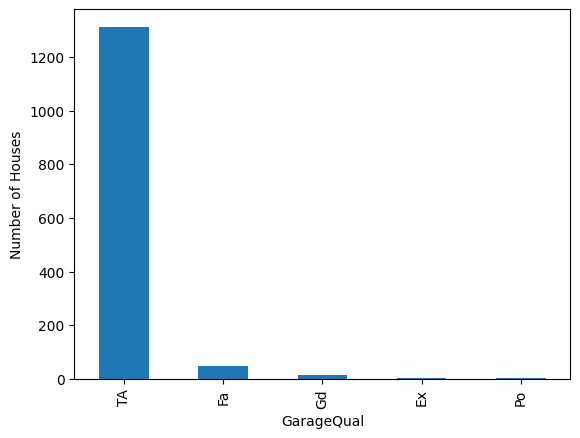

In [641]:
train_miss['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("Number of Houses")

In [642]:
train_miss['GarageQual'].fillna('Missing' , inplace=True)

/tmp/ipython-input-363894634.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_miss['GarageQual'].fillna('Missing' , inplace=True)


Text(0, 0.5, 'Number of Houses')

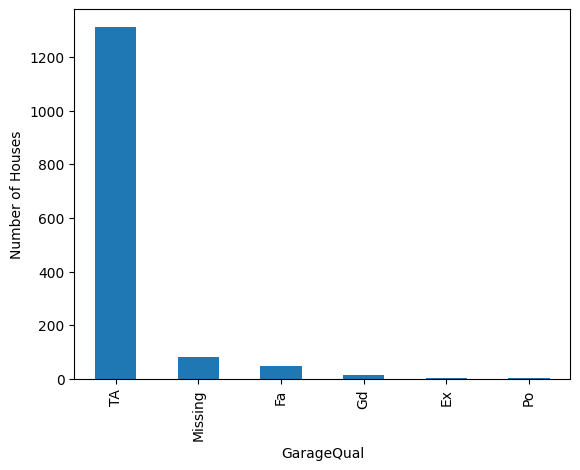

In [643]:
train_miss['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.ylabel("Number of Houses")

In [644]:
train_miss['GarageQual'].mode()

,GarageQual
0,TA


Text(0.5, 1.0, 'GarageQual')

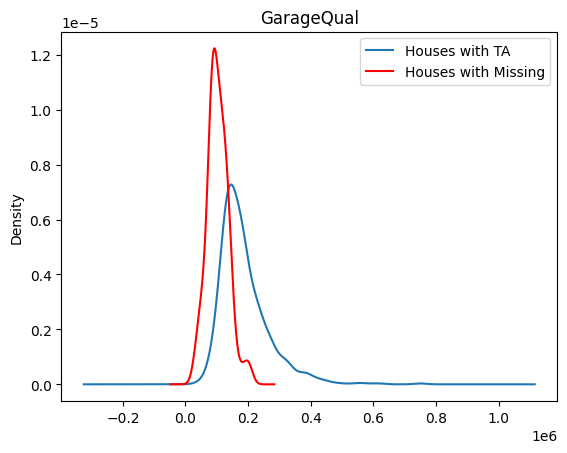

In [645]:
fig = plt.figure()
ax = fig.add_subplot(111)

train_miss[train_miss['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)

train_miss[train_miss['GarageQual']=='Missing']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with Missing']
ax.legend(lines, labels, loc='best')

plt.title('GarageQual')

In [646]:
temp = train_miss[train_miss['GarageQual']=='TA']['SalePrice']

In [647]:
train_miss['GarageQual'].fillna('TA', inplace=True)

<Axes: xlabel='GarageQual'>

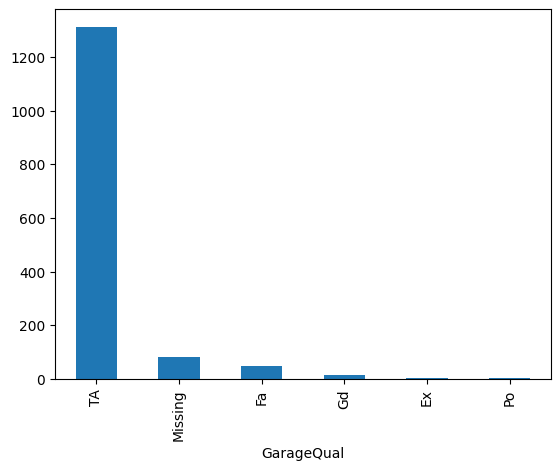

In [648]:
train_miss['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

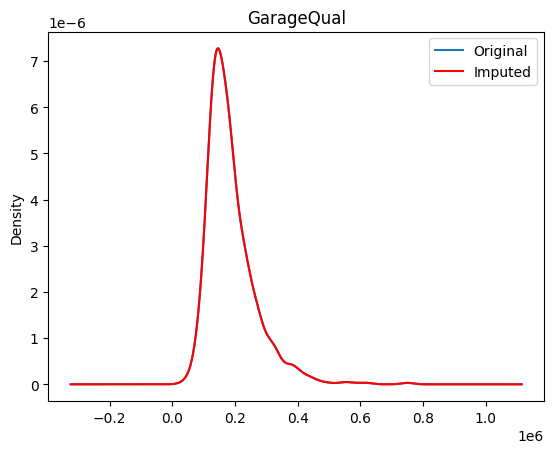

In [649]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind='kde', ax=ax)
temp = train_miss[train_miss['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original', 'Imputed']
ax.legend(lines, labels, loc='best')
plt.title("GarageQual")

<Axes: xlabel='FireplaceQu'>

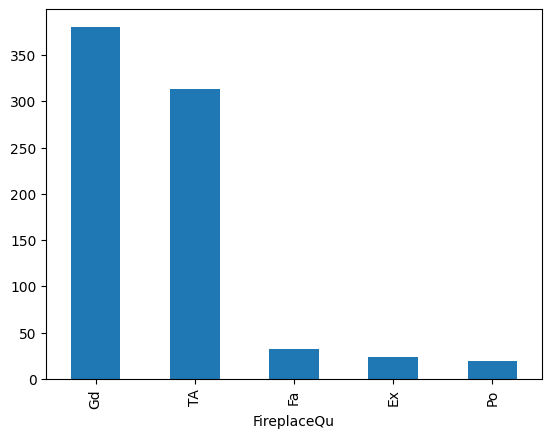

In [650]:
train_miss['FireplaceQu'].value_counts().plot(kind='bar')

In [651]:
train_miss['FireplaceQu'].mode()

,FireplaceQu
0,Gd


/tmp/ipython-input-1432652541.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_miss['FireplaceQu'].fillna('Missing', inplace=True)


Text(0.5, 1.0, 'FireplaceQu')

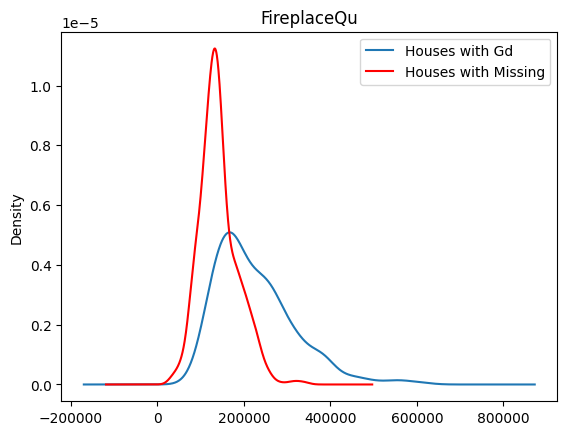

In [652]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Impute missing 'FireplaceQu' values with 'Missing' for plotting purposes
train_miss['FireplaceQu'].fillna('Missing', inplace=True)

train_miss[train_miss['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

train_miss[train_miss['FireplaceQu']=='Missing']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with Missing']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [653]:
temp = train_miss[train_miss['FireplaceQu']=='Gd']['SalePrice']

<Axes: xlabel='FireplaceQu'>

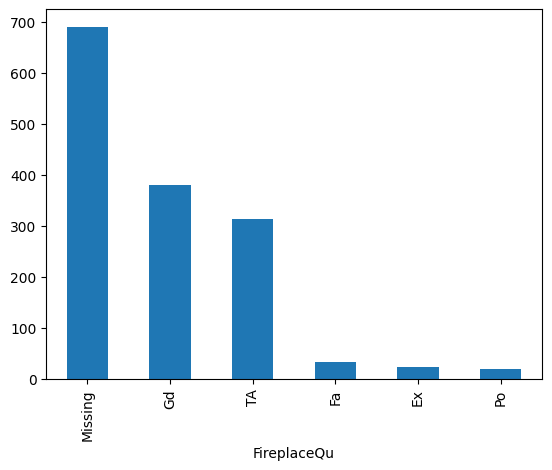

In [654]:
train_miss['FireplaceQu'].value_counts().plot(kind='bar')

In [655]:
train_miss['FireplaceQu'].fillna('Gd', inplace=True)

<Axes: xlabel='FireplaceQu'>

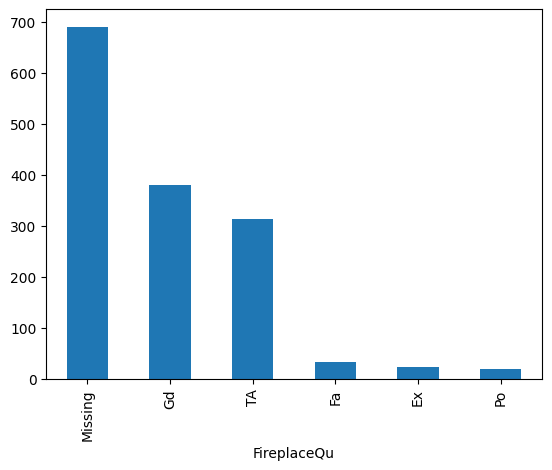

In [656]:
train_miss['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

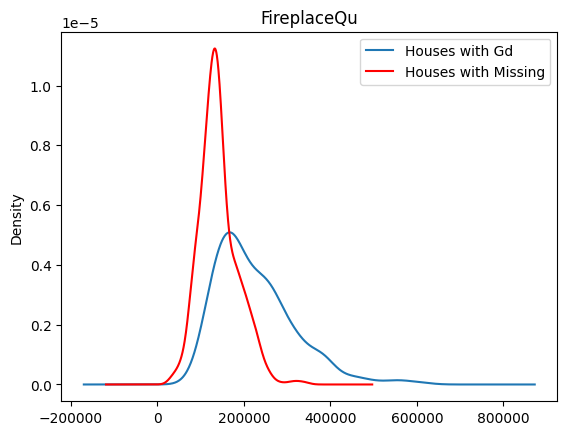

In [657]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Impute missing 'FireplaceQu' values with 'Missing' for plotting purposes
train_miss['FireplaceQu'].fillna('Missing', inplace=True)

train_miss[train_miss['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

train_miss[train_miss['FireplaceQu']=='Missing']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with Missing']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

Random Imputation

In [658]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [659]:
train_impute=pd.read_csv('/content/drive/MyDrive/train.csv',usecols=['Age','Fare','Survived'])
train_impute.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [660]:
train_impute.isnull().mean() * 100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [661]:
X = train_impute.drop(columns=['Survived'])
y = train_impute['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458
...,...,...
534,30.0,8.6625
584,NaN,8.7125
493,71.0,49.5042
527,NaN,221.7792


In [662]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [663]:
X_test.tail()


,Age,Fare,Age_imputed
89,24.0,8.0500,24.0
80,22.0,9.0000,22.0
846,NaN,69.5500,NaN
870,26.0,7.8958,26.0
251,29.0,10.4625,29.0


In [664]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values


/tmp/ipython-input-1280327713.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
/tmp/ipython-input-1280327713.py

In [665]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values


array([41.  , 47.  , 24.  , 34.5 ,  4.  , 33.  , 19.  , 54.  , 18.  ,
       27.  , 40.  , 32.  , 31.  , 21.  , 33.  , 24.  , 36.  , 29.  ,
       20.  ,  0.67, 58.  , 25.  , 24.  , 21.  , 16.  , 18.  , 60.  ,
       45.  , 28.  ,  2.  , 51.  , 14.  , 50.  , 26.  , 20.  , 59.  ,
       30.  , 16.  , 19.  , 34.  , 43.  , 26.  , 27.  , 11.  , 19.  ,
       35.  , 26.  , 36.  , 16.  , 34.  , 20.  , 39.  , 29.  , 24.  ,
       14.  , 19.  , 28.  , 54.  , 30.  ,  4.  , 58.  , 38.  , 22.  ,
        9.  , 31.  , 19.  ,  5.  , 25.  , 17.  , 42.  , 48.  , 29.  ,
       26.  , 23.  , 25.  , 25.  , 19.  , 32.  , 24.  , 38.  , 32.  ,
       36.  , 23.  , 28.5 , 17.  , 30.  , 56.  , 40.  , 47.  , 18.  ,
       32.5 , 50.  , 19.  , 26.  , 24.  , 31.  , 30.  , 23.  , 23.  ,
       57.  , 22.  , 30.  , 29.  , 45.  , 16.  , 40.5 ,  8.  , 18.  ,
       21.  , 24.  , 25.  , 26.  , 23.  , 27.  , 58.  , 31.  , 50.  ,
        9.  , 21.  , 26.  , 20.  , 30.  , 39.  , 34.  , 36.  , 18.  ,
       33.  , 32.  ,

In [666]:
X_train['Age'].isnull().sum()
X_train


,Age,Fare,Age_imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,21.0
493,71.0,49.5042,71.0
527,NaN,221.7792,20.0


/tmp/ipython-input-2131456624.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'],label='Original',hist=False)
/tmp/ipython-input-2131456624.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)


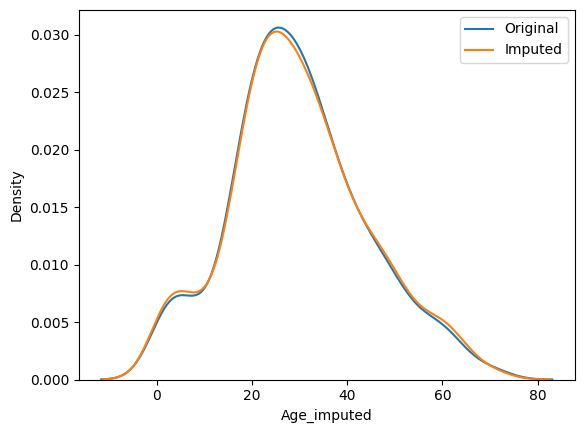

In [667]:
sns.distplot(X_train['Age'],label='Original',hist=False)
sns.distplot(X_train['Age_imputed'],label = 'Imputed',hist=False)
plt.legend()
plt.show()

In [668]:
print('Original variable variance: ', X_train['Age'].var())

# Ensure Age_imputed exists by re-running the imputation step if X_train was reset
# This code block has been moved here for demonstration. In a real scenario, you might want to ensure execution order or define a function for imputation.
if 'Age_imputed' not in X_train.columns:
    X_train['Age_imputed'] = X_train['Age']
    X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum(), random_state=42).values

print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.3495133904614
Variance after random imputation:  211.35211373105625


In [669]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()


,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,57.515179
Age,71.512440,204.349513,204.349513
Age_imputed,57.515179,204.349513,211.352114


<Axes: >

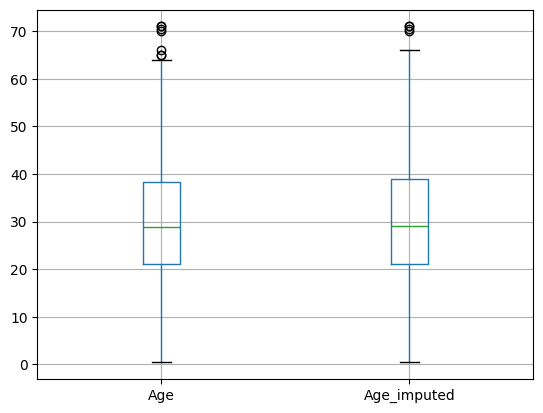

In [670]:
X_train[['Age', 'Age_imputed']].boxplot()


Missing Indicator

In [671]:
data_train = pd.read_csv('/content/drive/MyDrive/train_toy.csv',usecols=['GarageQual','FireplaceQu', 'SalePrice'])

In [672]:
data_train.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [673]:
data_train.isnull().mean() * 100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [674]:
X = data_train
y = data_train['SalePrice']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [675]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
493,Fa,TA,155000,TA,Fa
714,NaN,TA,130500,TA,NaN
880,NaN,TA,157000,TA,NaN
1374,Gd,TA,250000,TA,Gd
1253,Gd,TA,294000,TA,Gd


In [676]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/tmp/ipython-input-856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
/tmp/

In [677]:
temp = pd.concat(
        [
            X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
            X_train['GarageQual_imputed'].value_counts() / len(X_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.951043,0.949486
Fa,0.037171,0.037671
Gd,0.009973,0.011130
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [678]:
temp = pd.concat(
        [
            X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
            X_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,96.333333
TA,0.412439,80.000000
Fa,0.040917,8.166667
Po,0.027823,5.333333
Ex,0.024550,4.833333


/tmp/ipython-input-1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu']

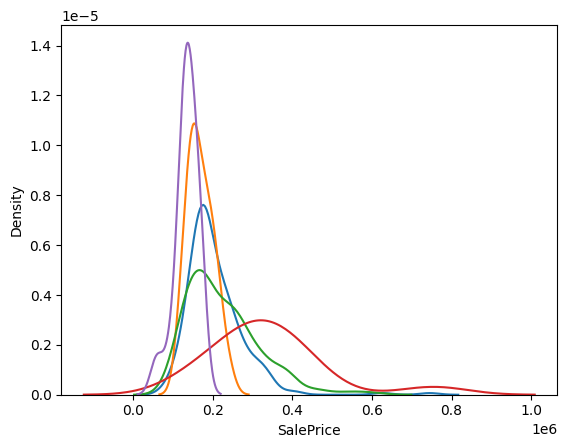

In [679]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

/tmp/ipython-input-722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
/tmp/ipython-input-722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firepla

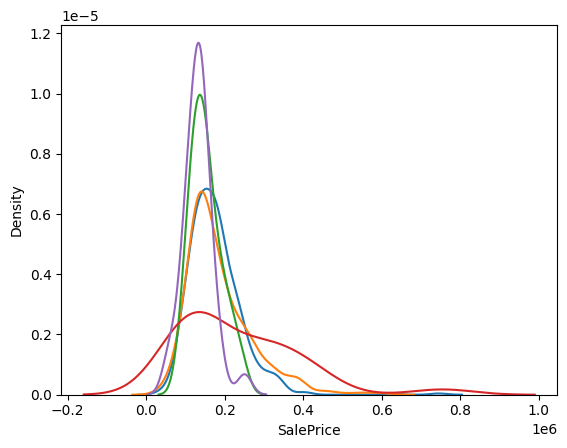

In [680]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

In [681]:
from sklearn.impute import MissingIndicator,SimpleImputer

In [682]:
train_impute=pd.read_csv('/content/drive/MyDrive/train.csv',usecols=['Age','Fare','Survived'])
train_impute.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [683]:
X = train_impute.drop(columns=['Survived'])
y = train_impute['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
X_train.head()

,Age,Fare
30,40.0,27.7208
10,4.0,16.7000
873,47.0,9.0000
182,9.0,31.3875
876,20.0,9.8458


In [684]:
si = SimpleImputer()
X_train_trf = si.fit_transform(X_train)
X_test_trf = si.transform(X_test)
X_train_trf

array([[ 40.        ,  27.7208    ],
       [  4.        ,  16.7       ],
       [ 47.        ,   9.        ],
       ...,
       [ 71.        ,  49.5042    ],
       [ 29.78590426, 221.7792    ],
       [ 29.78590426,  25.925     ]])

In [685]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf,y_train)

y_pred = clf.predict(X_test_trf)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [686]:
mi = MissingIndicator()

mi.fit(X_train)

MissingIndicator()

In [687]:
X_train_missing = mi.transform(X_train)

In [688]:
X_train_missing

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [689]:
si = SimpleImputer()

X_train_trf2 = si.fit_transform(X_train)
X_test_trf2 = si.transform(X_test)
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

In [690]:
si = SimpleImputer(add_indicator=True)
X_train = si.fit_transform(X_train)
X_test = si.transform(X_test)
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(X_train_trf2,y_train)

y_pred = clf.predict(X_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6145251396648045

**Outliers**

1. Z-Score

In [691]:
placement = pd.read_csv('/content/drive/MyDrive/placement (1).csv')

In [692]:
df.head(5)

,Product,Price,Size,Size_encoded,colour_encoded
0,A,100,Small,0.0,2
1,B,200,Medium,1.0,1
2,C,300,Large,2.0,0
3,D,400,Medium,1.0,1
4,E,500,Small,0.0,2


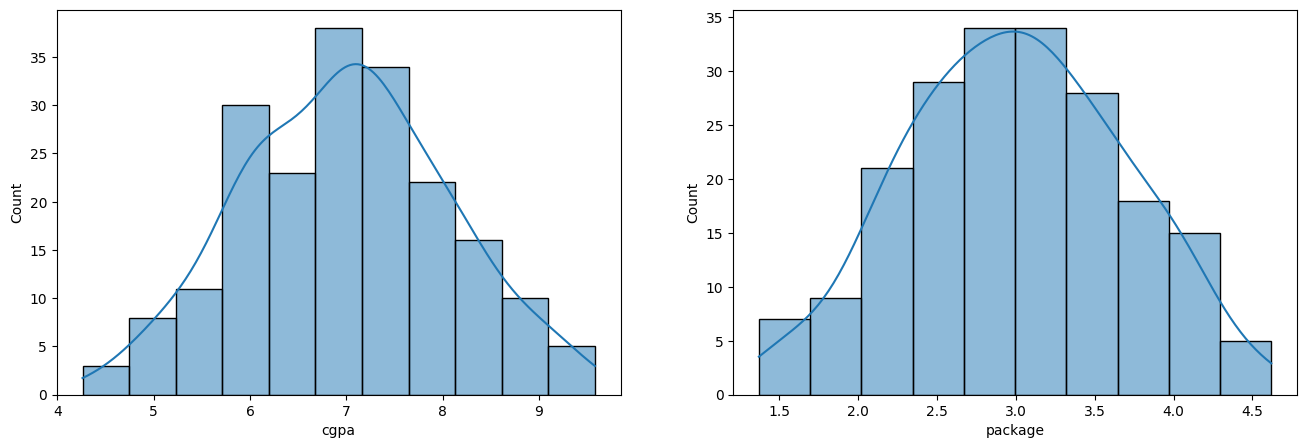

In [693]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.histplot(placement['cgpa'], kde=True)
plt.subplot(1,2,2)
sns.histplot(placement['package'], kde=True)
plt.show()

In [694]:
print("Mean value of cgpa" , placement['cgpa'].mean())
print("Std value of cgpa" , placement['cgpa'].std())
print("Min value of cgpa" , placement['cgpa'].min())
print("Max value of cgpa" , placement['cgpa'].max())

Mean value of cgpa 6.990500000000001
Std value of cgpa 1.0694086798895523
Min value of cgpa 4.26
Max value of cgpa 9.58


In [695]:
# Finding the boundary values
print("Highest allowed",placement['cgpa'].mean() + 3*placement['cgpa'].std())
print("Lowest allowed",placement['cgpa'].mean() - 3*placement['cgpa'].std())

Highest allowed 10.198726039668658
Lowest allowed 3.7822739603313438


In [696]:
# Finding the outliers
placement[(placement['cgpa'] > 8.80) | (placement['cgpa'] < 5.11)]

,cgpa,package
12,8.94,3.65
40,9.38,4.02
44,5.09,1.86
49,8.87,4.62
50,9.58,4.43
51,9.26,3.79
63,9.16,4.25
77,8.99,4.60
84,4.26,1.53
85,4.79,1.48


In [697]:
# Trimming

new_df = [(placement['cgpa'] < 8.80) & (placement['cgpa'] > 5.11)]
new_df

[0      True
 1      True
 2      True
 3      True
 4      True
        ... 
 195    True
 196    True
 197    True
 198    True
 199    True
 Name: cgpa, Length: 200, dtype: bool]

In [698]:
# Approach 2

# Calculating the Zscore

placement['cgpa_zscore'] = (placement['cgpa'] - placement['cgpa'].mean())/placement['cgpa'].std()
placement.head()

,cgpa,package,cgpa_zscore
0,6.89,3.26,-0.093977
1,5.12,1.98,-1.749097
2,7.82,3.25,0.775662
3,7.42,3.67,0.401624
4,6.94,3.57,-0.047222


In [699]:
placement[placement['cgpa_zscore'] > 3]

,cgpa,package,cgpa_zscore


In [700]:
placement[placement['cgpa_zscore'] < -3]

,cgpa,package,cgpa_zscore


In [701]:
placement[(placement['cgpa_zscore'] > 3) | (placement['cgpa_zscore'] < -3)]

,cgpa,package,cgpa_zscore


In [702]:
# Trimming
new_df = placement[(placement['cgpa_zscore'] < 3) & (placement['cgpa_zscore'] > -3)]
new_df

,cgpa,package,cgpa_zscore
0,6.89,3.26,-0.093977
1,5.12,1.98,-1.749097
2,7.82,3.25,0.775662
3,7.42,3.67,0.401624
4,6.94,3.57,-0.047222
...,...,...,...
195,6.93,2.46,-0.056573
196,5.89,2.57,-1.029073
197,7.21,3.24,0.205254
198,7.63,3.96,0.597994


In [703]:
upper_limit = placement['cgpa'].mean() + 3*placement['cgpa'].std()
lower_limit = placement['cgpa'].mean() - 3*placement['cgpa'].std()
lower_limit

np.float64(3.7822739603313438)

In [704]:
placement['cgpa'] = np.where(
    placement['cgpa']>upper_limit,
    upper_limit,
    np.where(
        placement['cgpa']<lower_limit,
        lower_limit,
        placement['cgpa']
    )
)
placement.shape

(200, 3)

In [705]:
placement['cgpa'].describe()

,cgpa
count,200.000000
mean,6.990500
std,1.069409
min,4.260000
25%,6.190000
50%,6.965000
75%,7.737500
max,9.580000


2. IQR Method

In [706]:
placement.describe()

,cgpa,package,cgpa_zscore
count,200.000000,200.000000,2.000000e+02
mean,6.990500,2.996050,-7.682743e-16
std,1.069409,0.691644,1.000000e+00
min,4.260000,1.370000,-2.553280e+00
25%,6.190000,2.487500,-7.485445e-01
50%,6.965000,2.995000,-2.384495e-02
75%,7.737500,3.492500,6.985169e-01
max,9.580000,4.620000,2.421432e+00


<Axes: ylabel='package'>

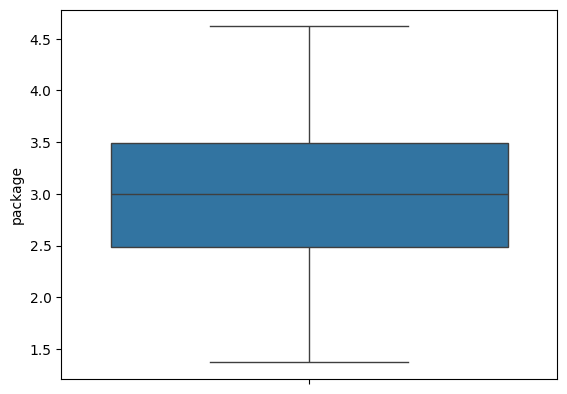

In [707]:
sns.boxplot(placement['package'])

In [708]:
#finding percentile

percentile25 = placement['package'].quantile(0.25)
percentile75 = placement['package'].quantile(0.75)

In [709]:
iqr = percentile75 - percentile25
iqr

np.float64(1.005)

In [710]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [711]:
print("Upper Limit" , upper_limit)
print("Lower Limit", lower_limit)

Upper Limit 5.0
Lower Limit 0.9800000000000004


In [712]:
placement[placement['package'] > upper_limit]

,cgpa,package,cgpa_zscore


In [713]:
placement[placement['package'] < lower_limit]

,cgpa,package,cgpa_zscore


In [714]:
new_placement = placement[placement['package'] < upper_limit]

In [715]:
new_placement.shape

(200, 3)

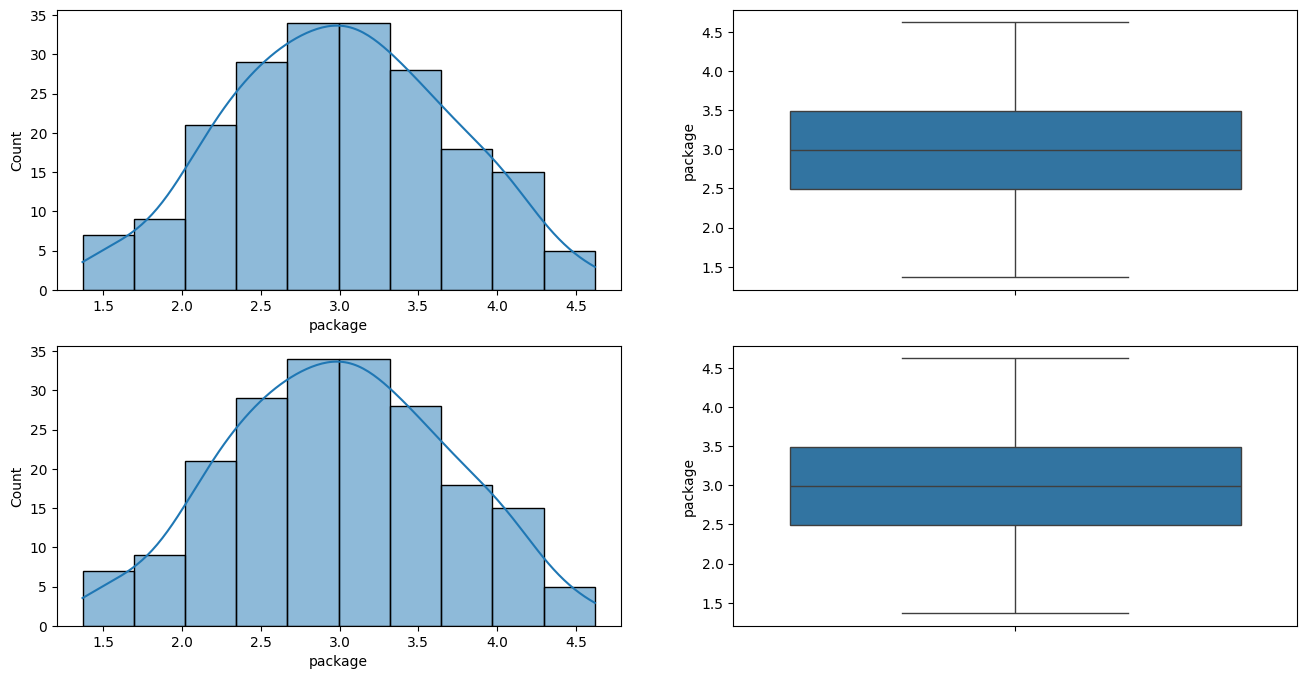

In [716]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(placement['package'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(placement['package'])

plt.subplot(2,2,3)
sns.histplot(new_placement['package'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_placement['package'])

plt.show()

In [717]:
new_df_cap = placement.copy()

new_df_cap['package'] = np.where(
    new_df_cap['package'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['package'] < lower_limit,
        lower_limit,
        new_df_cap['package']
    )
)
new_df_cap.shape

(200, 3)

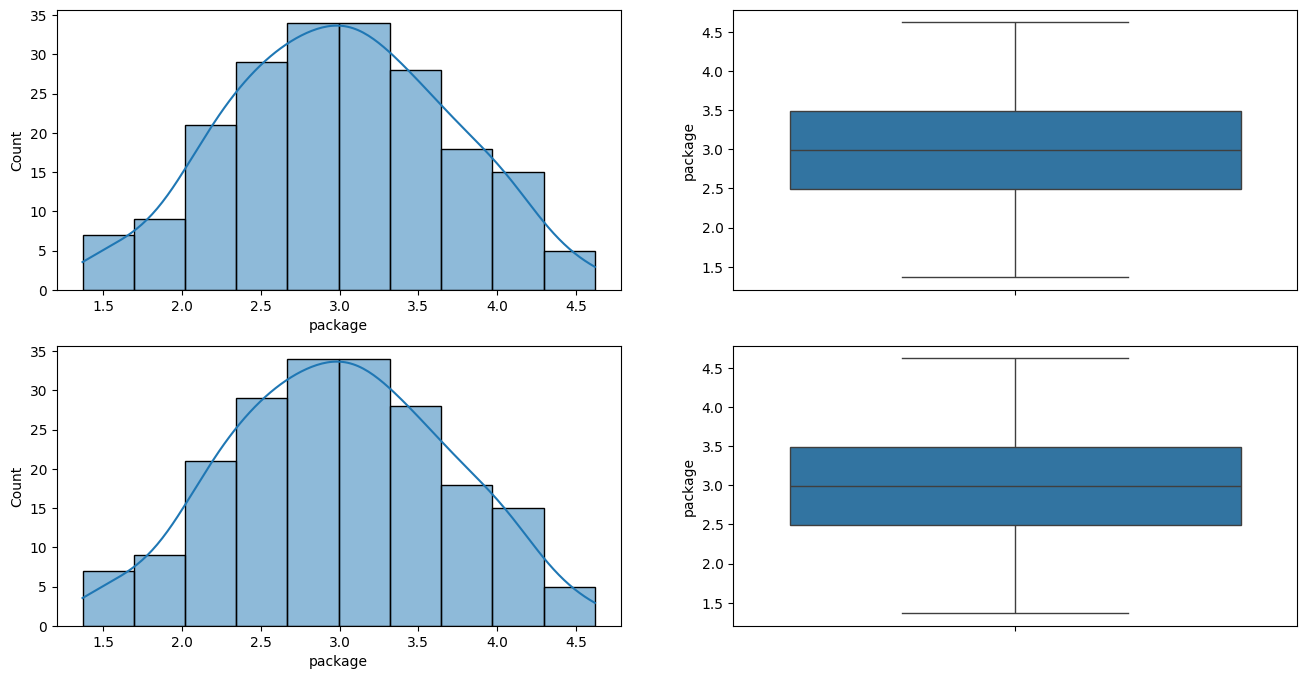

In [718]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(placement['package'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(placement['package'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['package'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['package'])

plt.show()

3. Percentile Method

In [719]:
height_weight = pd.read_csv('/content/drive/MyDrive/weight-height.csv')

In [720]:
height_weight.shape

(10000, 3)

In [721]:
height_weight['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


/tmp/ipython-input-3921317919.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(height_weight['Height'])


<Axes: xlabel='Height', ylabel='Density'>

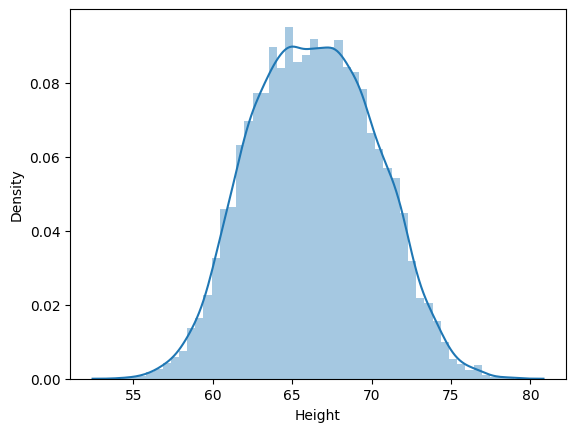

In [722]:
sns.distplot(height_weight['Height'])

<Axes: ylabel='Height'>

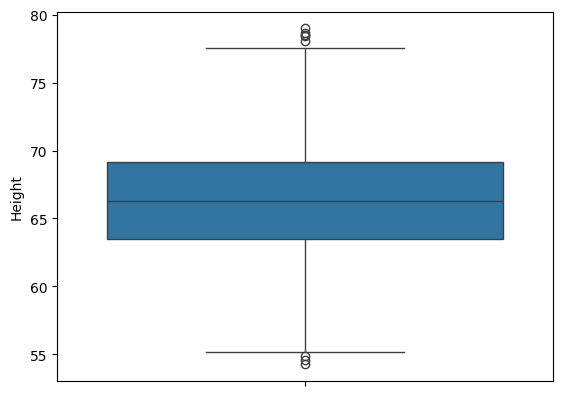

In [723]:
sns.boxplot(height_weight['Height'])

In [724]:
#Trimming
upper_limit = height_weight['Height'].quantile(0.99)
upper_limit

np.float64(74.7857900583366)

In [725]:
lower_limit = height_weight['Height'].quantile(0.01)
lower_limit

np.float64(58.13441158671655)

In [726]:
height_weight[(height_weight['Height'] >= 74.78) | (height_weight['Height'] <= 58.13)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [727]:
new_hw = height_weight[(height_weight['Height'] <= 74.78) & (height_weight['Height'] >= 58.13)]
new_hw

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [728]:
height_weight['Height'].describe()

,Height
count,10000.000000
mean,66.367560
std,3.847528
min,54.263133
25%,63.505620
50%,66.318070
75%,69.174262
max,78.998742


In [729]:
new_hw['Height'].describe()

,Height
count,9799.000000
mean,66.363507
std,3.644267
min,58.134496
25%,63.577147
50%,66.317899
75%,69.119859
max,74.767447


/tmp/ipython-input-2943298863.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_hw['Height'])


<Axes: xlabel='Height', ylabel='Density'>

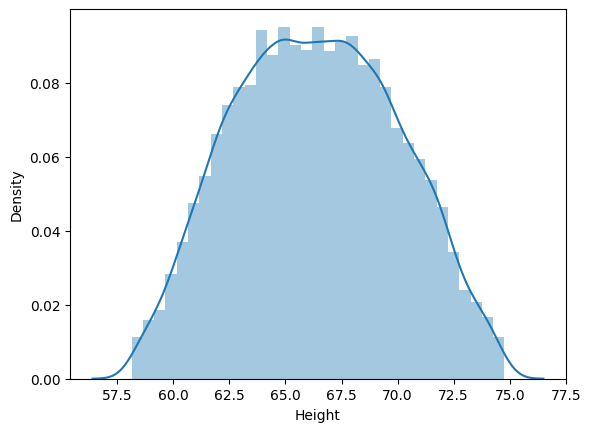

In [730]:
sns.distplot(new_hw['Height'])

<Axes: ylabel='Height'>

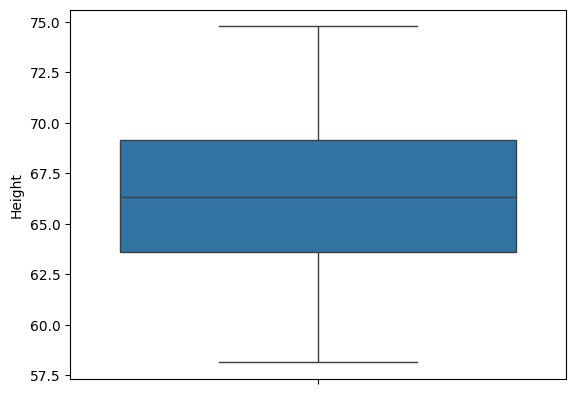

In [731]:
sns.boxplot(new_hw['Height'])

In [732]:
new_hw_cap = height_weight.copy()
new_hw_cap['Height'] = np.where(
    new_hw_cap['Height'] >= upper_limit,
    upper_limit,
    np.where(
        new_hw_cap['Height'] <= lower_limit,
        lower_limit,
        new_hw_cap['Height']
    )
)
print(new_hw_cap.shape)

(10000, 3)


/tmp/ipython-input-139419886.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_hw_cap['Height'])


<Axes: xlabel='Height', ylabel='Density'>

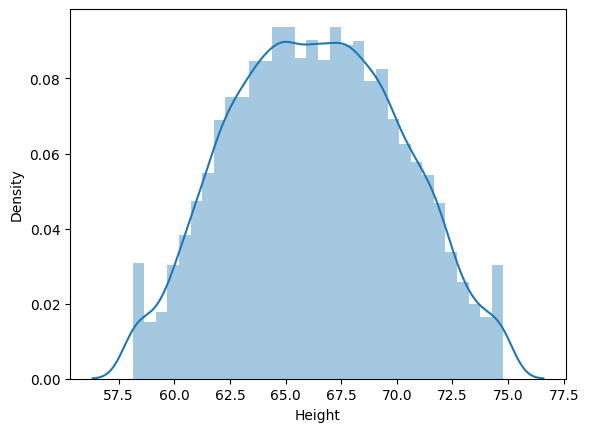

In [733]:
sns.distplot(new_hw_cap['Height'])

<Axes: ylabel='Height'>

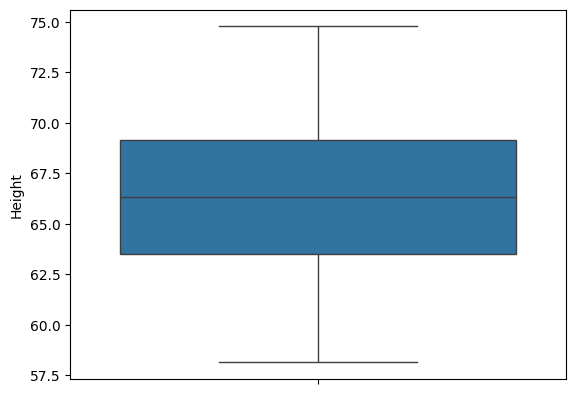

In [734]:
sns.boxplot(new_hw_cap['Height'])

**Feature Construction**

In [735]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'Age': [20, 35, 50],
    'Salary': [30000, 50000, 90000],
    'Height': [1.70, 1.80, 1.75],
    'Weight': [65, 75, 80]
})

# Mathematical Feature
df['BMI'] = df['Weight'] / (df['Height'] ** 2)

# Interaction feature
df['age_salary_ratio'] = df['Salary'] / df['Age']

# Polynomial feature
df['age_squared'] = df['Age'] ** 2

print(df)


   Age  Salary  Height  Weight        BMI  age_salary_ratio  age_squared
0   20   30000    1.70      65  22.491349       1500.000000          400
1   35   50000    1.80      75  23.148148       1428.571429         1225
2   50   90000    1.75      80  26.122449       1800.000000         2500
